### Year: 2024 
### Course: Financial Technology and Analytics
### Topic: Application of Statistical and Probabilistic Theory.
### Name: Hitanshu Venkata sai Reddy Surap Reddy

# Abstract 

- In this Final research project we will implement many probabilistic/statistical techniques like combinatorial analysis, axioms, independence, Expectation properties, Limit theorems, Simulations and Dimension reduction methods such as factor analysis.
- We will Simulate different distributions for Continuous and Discrete Random Variables. Analyzing and Interpreting output is one of the main goal of this project.
- Methodology used are Statistical Analysis, Visualization, Central Limit Theorem Verification, Outlier Analysis and Detection, Probability Calculations, plotting CDF of different distributions.
- We also took some real raw data and then applied Bayes Theorem to find out the Probability of a given case and then we did Factor analysis for Dimensionality reduction.


# Chapter 1: Introduction

- We first Simulated many random numbers to look at different distributions; then we Verified Central Limit Theorem for every distribution
- Simulation of Discrete Random Variables, Simulation of Continuous Random Variables.
- Markov Chains is another interesting concept that we looked into. We created a Transition Matrix, Modeled Recurrent Events, Compared the time-averaged behavior to the state probabilites, Sensitivity Analysis. Lastly Visualizations were plotted wherever necessary.
- We then took some real data and then produced some research questions to work on. We applied `Bayes theorem` to find answers to our research 
question. 
- I then took another dataset where the number of features to be taken care of had to be reduced. I applied `Factor analysis` which is a Dimensionality reductionmethod to reduce the numbers of features of a dataset.
- Overall this Project is to APPLY all the important techniques we learnt from Probability Theory. 

# Chapter 2: Data Description

In [1]:
options(warn=-1)

In [2]:
# Loading Libraries
library(psych)
library(tidyverse)
#install.packages('expm')
library(expm)
library(RColorBrewer)
library(dplyr)
library(readxl)
library(skimr)
library(caret)
library(stats)
library(corrplot) #plotting correlation matrices.
library(ggplot2) # For plotting purposes.
library(GPArotation) #methods for factor rotation.
library(nFactors) #methods for determining the number of factors.
setwd('C:/Users/hsura/OneDrive - stevens.edu/Probability/project/')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'expm'


The following object is masked from 'package:Matrix':

    expm


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


corrplot 0.92 loaded




- I have taken two datasets for this Project.
- The first dataset was chosen on the basis of whether Bayes theorem can be use case for that dataset and the second one was chosen with high features so that we can use the Factor analysis technique that we learnt in Probability.

- DATA ONE: CHICAGO TAXI DATA
- LINK: https://dasl.datadescription.com/datafile/chicago_taxi/
- DATA TYPE: CATEGORICAL
- DATA EXTRACTED FROM -> Chicago’s Department of Business Affairs and Consumer Protection
- DATA DESCRIPTION:
      This dataset provides monthly reports of all taxi trips in Chicago, tagged with trip distances, trip durations,fare amounts, and tip amounts. The dataset Chicago taxi holds data on 13,082 taxi trips for which the duration exceeded 1 minute and for which payment was made either in cash or with a credit card. Speed is given in miles per hour averaged over the trip. Beware possible outliers (e.g. speeds of 162 mph)

- PROBLEMS: There were possible outliers in the speed column but that can be ignored because our research questions does not require that column.

In [3]:
chicago_cab <- read_xlsx('datasets/chicago_taxi.xlsx')
chicago_cab %>% head()

date,daytype,seconds,miles,tips,total,payment_type,speed
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2019-09-09,weekday,601,1.56,2,10.25,Credit,9.344426
2019-08-29,weekday,346,0.73,2,8.25,Credit,7.595376
2019-02-22,weekend,931,3.29,0,13.75,Cash,12.721805
2019-05-30,weekday,252,0.70,0,5.25,Cash,10.000000
2019-07-21,weekday,393,1.12,0,7.25,Cash,10.259542
2019-11-30,weekend,1320,1.10,1,46.25,Credit,3.000000


- DATA TWO: This is simulated data - modeled after a private data set
- LINK: https://quantdev.ssri.psu.edu/sites/qdev/files/ptechdata.csv
- There are 2 samples in the data - designated by id.

In [4]:
ptech <- read.csv('datasets/ptechdata.csv')
ptech %>% head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.84,-0.27,-0.59,-0.97,-0.72,-1.86,1.11,0.46,0.09
2,1,-0.04,-0.33,-0.54,2.57,1.30,0.59,1.42,2.56,0.66
3,1,0.34,-0.23,0.99,-1.84,-1.62,-1.55,1.05,0.22,0.60
4,1,-1.01,-1.96,-1.17,-2.93,-1.75,-1.89,-0.51,-0.07,1.14
5,1,2.02,0.21,0.97,0.13,-0.01,-0.88,-1.22,0.54,-0.28
6,1,-0.24,-0.19,0.23,0.80,1.06,1.61,1.31,-1.10,0.26


# Chapter 3: Methodology

Statistical Measures

Mean: The average value of a dataset, calculated by summing all values and dividing by the count.

Variance: Measures the spread of data points around the mean. Calculated as the average of the squared differences from the mean.

Standard Deviation: The square root of variance, showing spread in the same units as the data.

Mode: The most frequently occurring value in a dataset.

First Quantile (Q1): The value below which 25% of the data fall.

Third Quantile (Q3): The value below which 75% of the data fall.
Probability and Distributions

Outlier Analysis: It is the process of identifying outliers, or abnormal observations, in a dataset.

Central Limit Theorem Verification that is verifying that as the number of sample means increase for different distributions it approximates to a gaussian distribution.

Probability Calculations: It is to determine the likelihood of a random variable.

Joint Distributions: Probability distribution of two or more variables.

Conditional Expectations: Expected value of a variable given the value of another.

Bayes’ Rule: Updates the probability of a hypothesis based on new evidence.
Random Variables and Order Statistics

Discrete Random Variables: Countable values (e.g., number of heads in coin flips).

Continuous Random Variables: Infinite possible values within a range (e.g., height).

Order Statistics: Statistics from ordered values of a sample (e.g., minimum and maximum).
Correlation and Markov Chains

Correlation: Measures the relationship between two variables. Positive means they move in the same direction, negative means opposite.

Markov Chains: A process where the probability of each event depends only on the previous state.
Simulation Techniques

Used to model complex systems and evaluate performance under various scenarios.
Factor Analysis

Reduces observed variables into a smaller number of factors to simplify data analysis.
Other Techniques

 Hypothesis Testing: Determines if there's significant evidence for a hypothesis.
 Principal Component Analysis (PCA): Reduces data dimensionality while retaining most variance.
 Data Cleaning: Prepares data by handling missing values and outliers.
 Visualization: Graphically represents data to understand and communicate results.

Application in This Project

Exploratory Data Analysis (EDA): Summarizing data with mean, variance, and standard deviation.
Visualization: Creating plots to show distributions, relationships, and trends.
Factor Analysis: Identifying key factors by reducing data dimensions.
Hypothesis Testing: Comparing statistics to test research questions.
Correlation Analysis: Examining relationships between variables.
Simulation: Modeling scenarios to predict outcomes.

# Chapter 4: Analysis and Results

# Simulation Data Analysis

# Simulating Continuous Random Variables

In [5]:
c_normal_dist<- rnorm(500,0,0.1) # Generating Normal Random Variables
c_exp_dist <- rexp(500, 2) # Generating Exponential Random Variables
cont_data <- as.data.frame(cbind(c_normal_dist,c_exp_dist))

## Normal Distribution

In [6]:
cont_data %>% pull(c_normal_dist)%>% describe()
normal_mean <- cont_data %>% pull(c_normal_dist) %>% mean()
normal_sd <- cont_data %>% pull(c_normal_dist) %>% sd()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,500,0.003506396,0.09668058,0.006392691,0.003991637,0.09380782,-0.3060306,0.2802378,0.5862684,-0.05987917,0.03014749,0.004323687


In [7]:
normal_quantile <- cont_data%>% pull(c_normal_dist)%>%interp.quart()

n1_quantile<- normal_quantile[1]
n2_quantile<- normal_quantile[2]
n3_quantile<- normal_quantile[3]

cat('First Quantile',n1_quantile, '\n'); cat('Second Quantile',n2_quantile, '\n');cat('Third Quantile',n3_quantile)

First Quantile -0.06043533 
Second Quantile 0.006392691 
Third Quantile 0.06375722

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


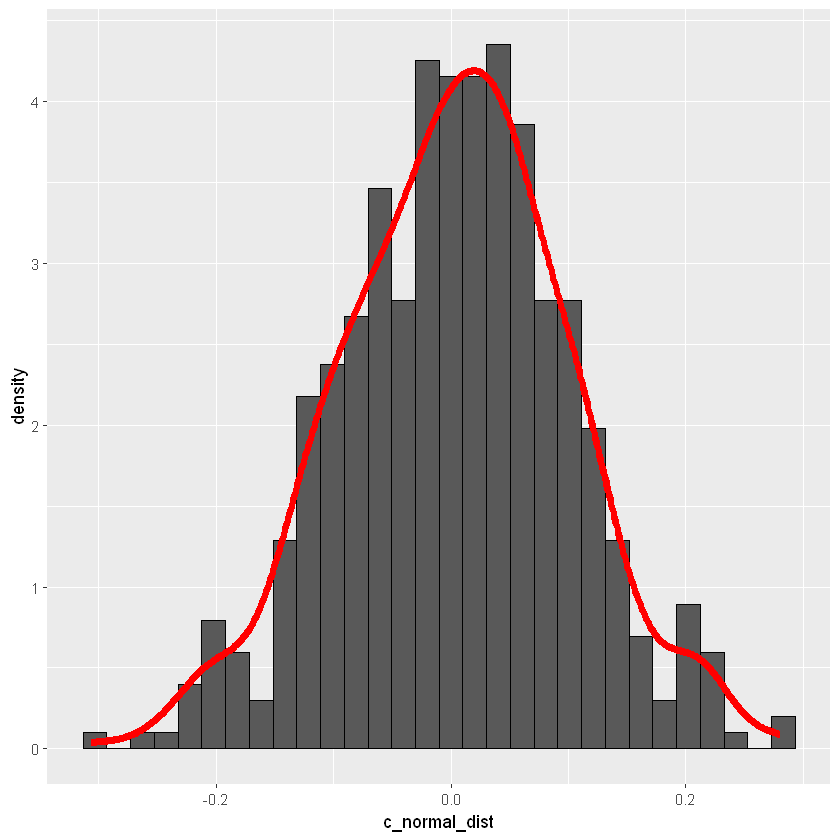

In [8]:
ggplot(cont_data, aes(x=c_normal_dist, y =after_stat(density)))+geom_histogram(color='black') + geom_density(color='red',linewidth=2)

### Central Limit Theorem Verification 

## The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size increases, regardless of the population's distribution. Here we verify Central Limit Theorem for a Normal Distribution and a Exponential Distribution. Usually its not required to verify an already normal distribution, I have verified CLT for other distributions like Poisson and Exponential.

### I have taken three sample sizes where n that is number of sample size increments to the before sample. We then plotted out them to se the verified Central Limit Theorem.

In [9]:
clt <- function(sample_size, no_of_sample_means) {
  mean_list <- c()
  for (i in 1:no_of_sample_means) {
    sample <- sample(cont_data%>% pull(c_normal_dist), size = sample_size, replace = FALSE)
    sample_mean <- mean(sample)
    mean_list <- c(mean_list, sample_mean)
  }
  return(mean_list)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


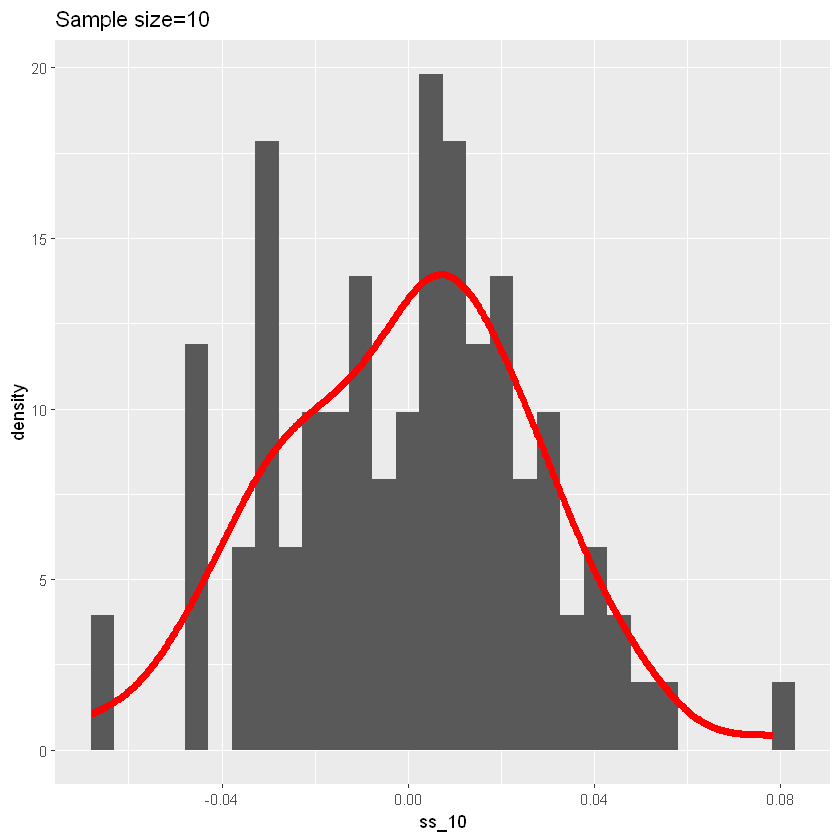

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


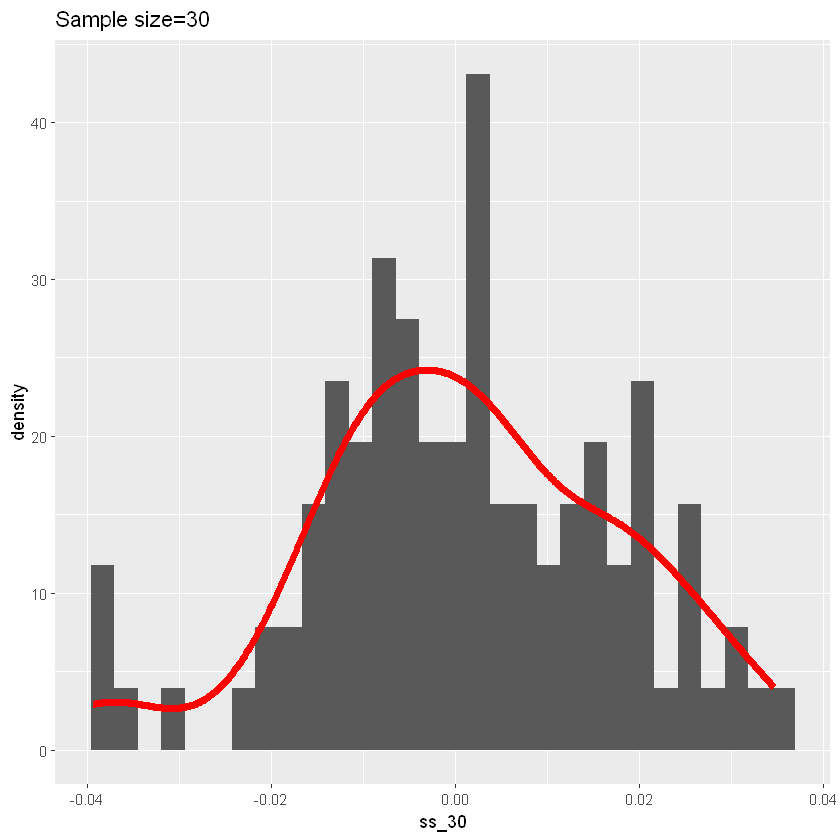

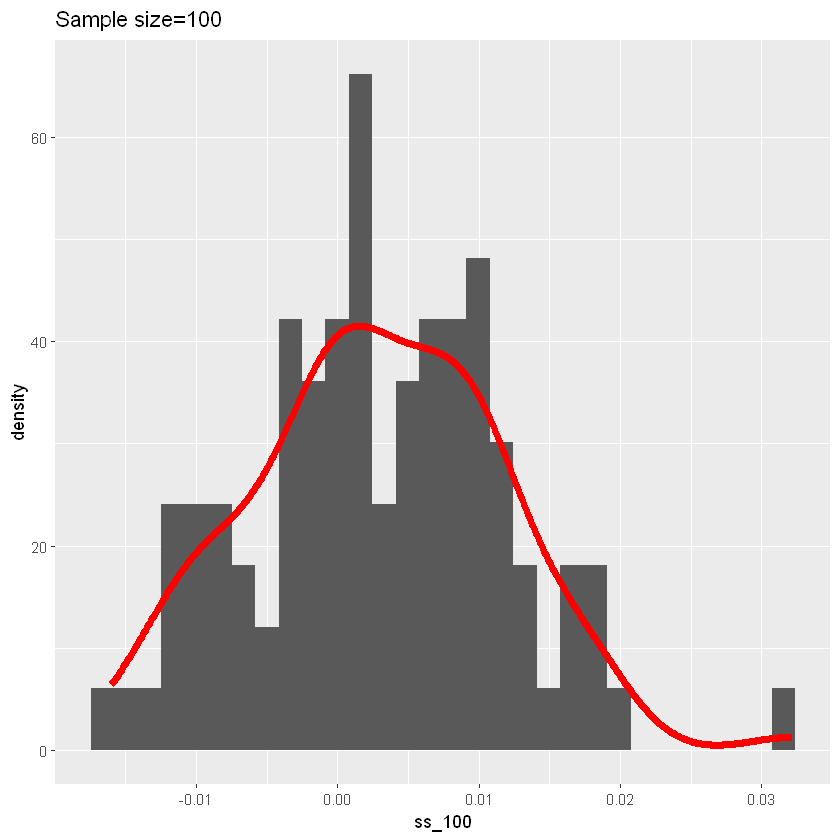

In [10]:
ss_10<- clt(10,100)
ss_30 <- clt(30,100)
ss_100<- clt(100,100)
clt_verify <- data.frame(ss_10,ss_30,ss_100)

ggplot(clt_verify, aes(x=ss_10,y=after_stat(density))) + geom_histogram()+ geom_density(color='red',linewidth=2)+labs(title='Sample size=10')
ggplot(clt_verify, aes(x=ss_30, y=after_stat(density))) +geom_histogram() + geom_density(color='red',linewidth=2)+labs(title='Sample size=30')
ggplot(clt_verify, aes(x=ss_100, y=after_stat(density))) +geom_histogram() + geom_density(color='red',linewidth=2)+labs(title='Sample size=100')

### Outlier Analysis

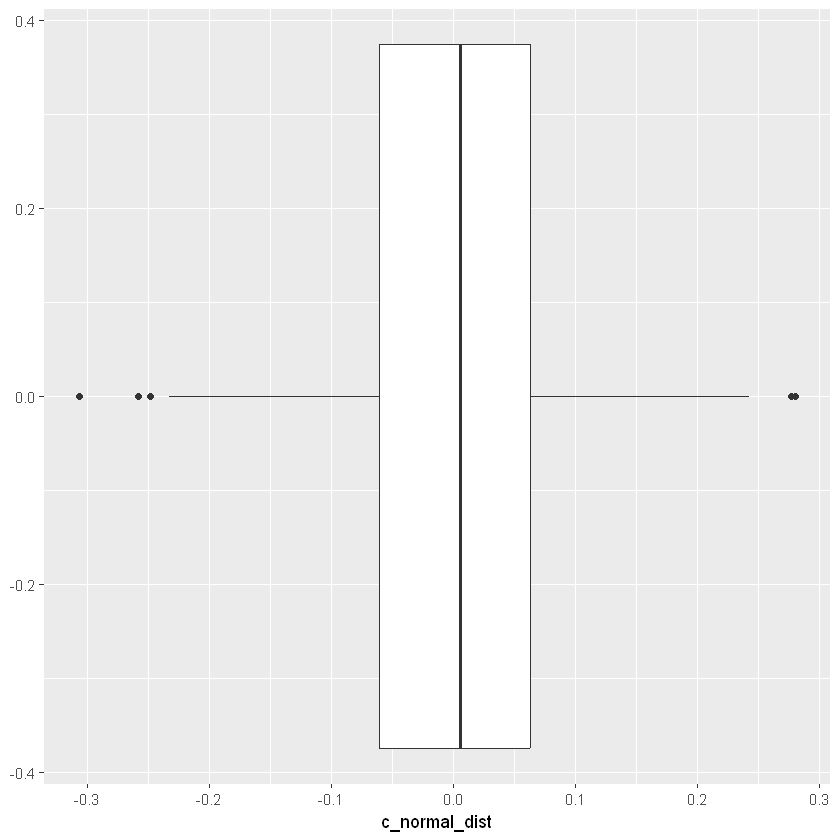

In [11]:
ggplot(cont_data, aes(x=c_normal_dist)) + geom_boxplot()

In [12]:
norm_iqr <- n3_quantile - n1_quantile
cont_data %>% pull(c_normal_dist) %>% .[(c_normal_dist<(n1_quantile-1.5*norm_iqr))|(c_normal_dist>(n3_quantile+1.5*norm_iqr))]


[1] -0.3060306  0.2802378 -0.2580318 -0.2477696  0.2768905

In [13]:
upper_limit <- normal_mean + 2.73 * normal_sd
lower_limit <- normal_mean - 2.73 * normal_sd
cont_data %>% pull(c_normal_dist) %>% .[(c_normal_dist > upper_limit)|(c_normal_dist < lower_limit)]

[1] -0.3060306  0.2802378  0.2768905

### Probability Calculations

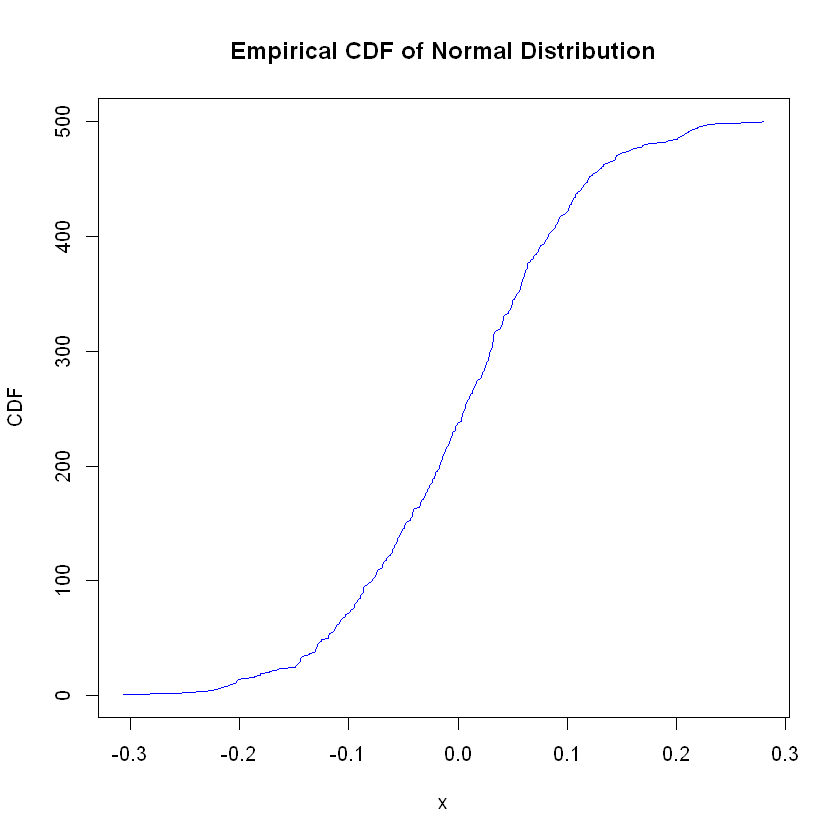

In [14]:
c_normal_dist_sort <- sort(c_normal_dist)
plot(c_normal_dist_sort, seq_along(c_normal_dist_sort), type = "l", col = "blue", xlab = "x", ylab = "CDF", main = "Empirical CDF of Normal Distribution")

#### P(2 < X  -1 )

In [15]:
1 - pnorm(2, mean = -1, sd = 0.1)

[1] 0

#### P(X<=2)

In [16]:
pnorm(2,0,0.1)

[1] 1

#### P(X >=1)

In [17]:
pnorm(1, 0, 0.1, lower.tail = FALSE)

[1] 7.619853e-24

#### P(X=1)

In [18]:
dnorm(1, mean = 0, sd = 0.1)

[1] 7.694599e-22

## Exponential Distribution

In [19]:
cont_data %>% pull(c_exp_dist)%>% describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,500,0.4852016,0.4889651,0.3210844,0.4005337,0.3334003,0.0004996973,3.05936,3.05886,1.81772,4.065458,0.02186718


In [20]:
exp_quantile <- cont_data%>% pull(c_exp_dist)%>%interp.quart()

e1_quantile<- exp_quantile[1]
e2_quantile<- exp_quantile[2]
e3_quantile<- exp_quantile[3]

cat('First Quantile',e1_quantile, '\n'); cat('Second Quantile',e2_quantile, '\n');cat('Third Quantile',e3_quantile)

First Quantile 0.1402208 
Second Quantile 0.3210844 
Third Quantile 0.6787044

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


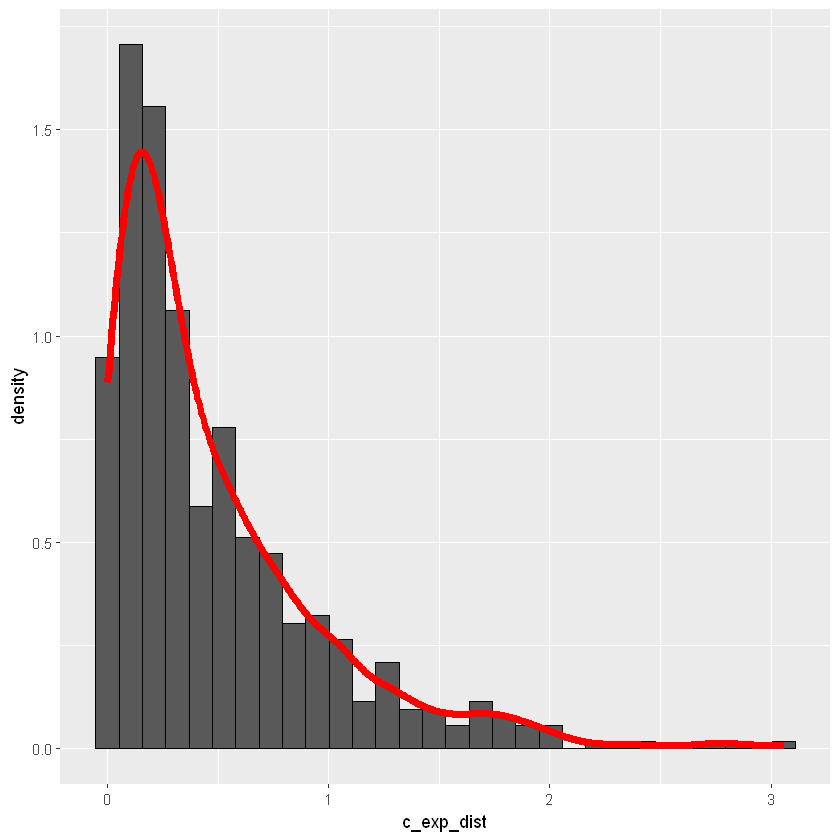

In [21]:
ggplot(cont_data, aes(x=c_exp_dist, y =after_stat(density)))+geom_histogram(color='black') + geom_density(color='red', linewidth=2)

In [22]:
e_clt <- function(sample_size, no_of_sample_means) {
  mean_list <- c()
  for (i in 1:no_of_sample_means) {
    sample <- sample(cont_data%>% pull(c_exp_dist), size = sample_size, replace = FALSE)
    sample_mean <- mean(sample)
    mean_list <- c(mean_list, sample_mean)
  }
  return(mean_list)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


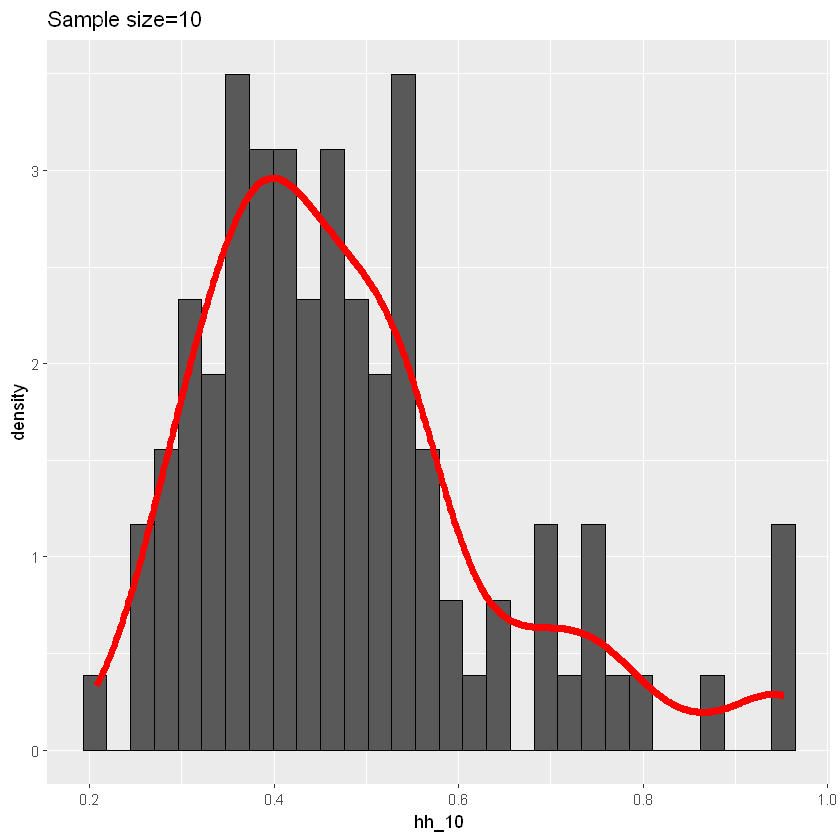

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


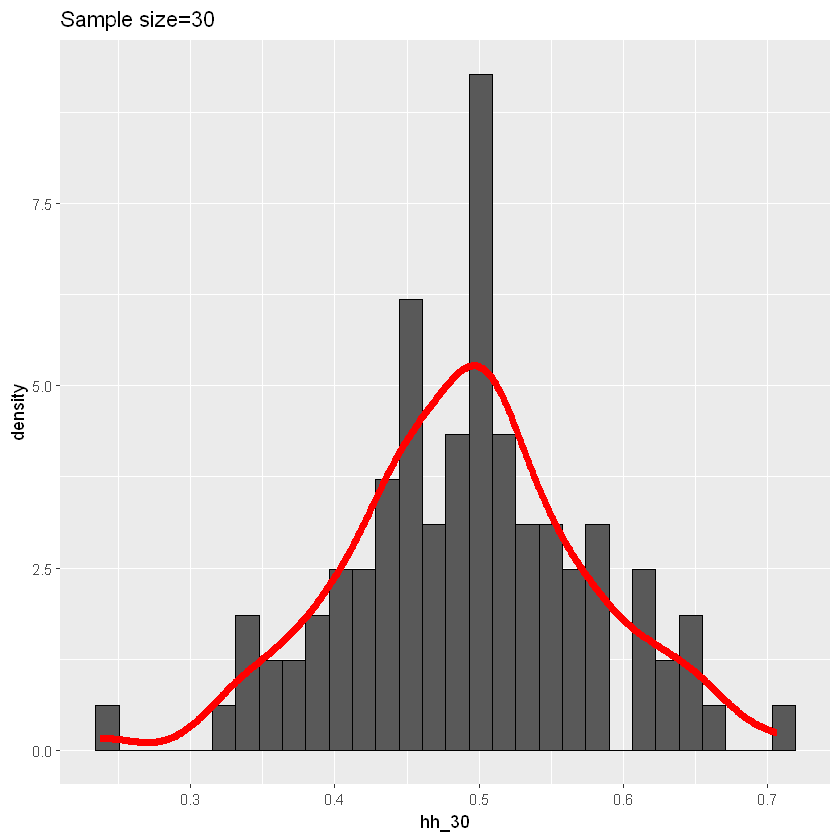

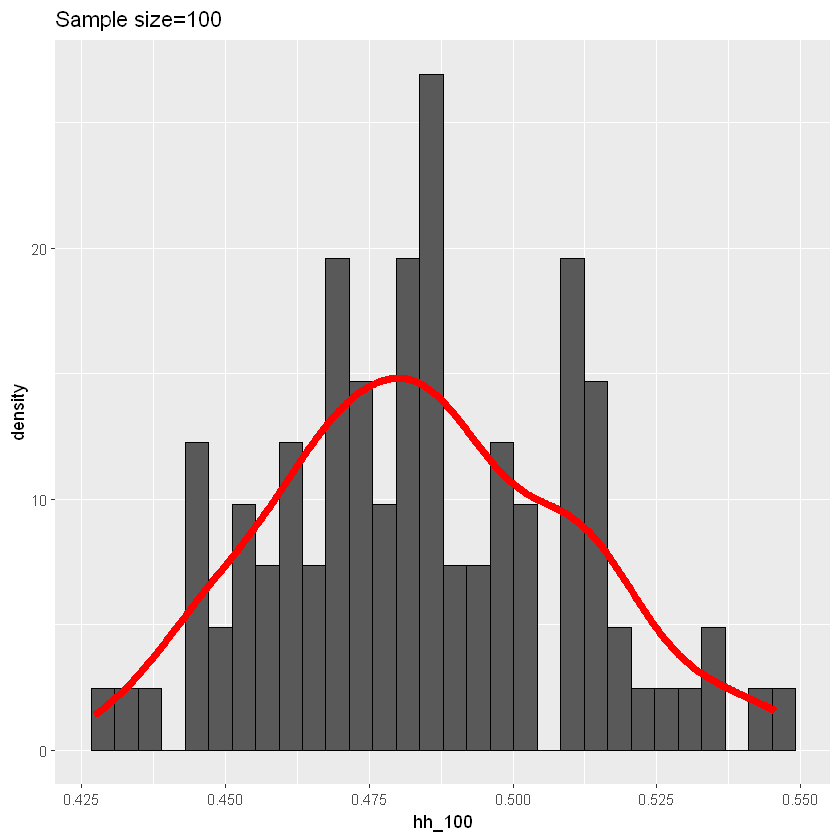

In [23]:
hh_10<- e_clt(10,100)
hh_30 <- e_clt(30,100)
hh_100<- e_clt(250,100)
clt_verify_e <- data.frame(hh_10,hh_30,hh_100)

ggplot(clt_verify_e, aes(x=hh_10,y=after_stat(density))) + geom_histogram(color='black')+ geom_density(color='red',linewidth=2)+labs(title='Sample size=10')
ggplot(clt_verify_e, aes(x=hh_30, y=after_stat(density))) +geom_histogram(color='black') + geom_density(color='red',linewidth=2)+labs(title='Sample size=30')
ggplot(clt_verify_e, aes(x=hh_100, y=after_stat(density))) +geom_histogram(color='black') + geom_density(color='red',linewidth=2)+labs(title='Sample size=100')

### Probability Calculations

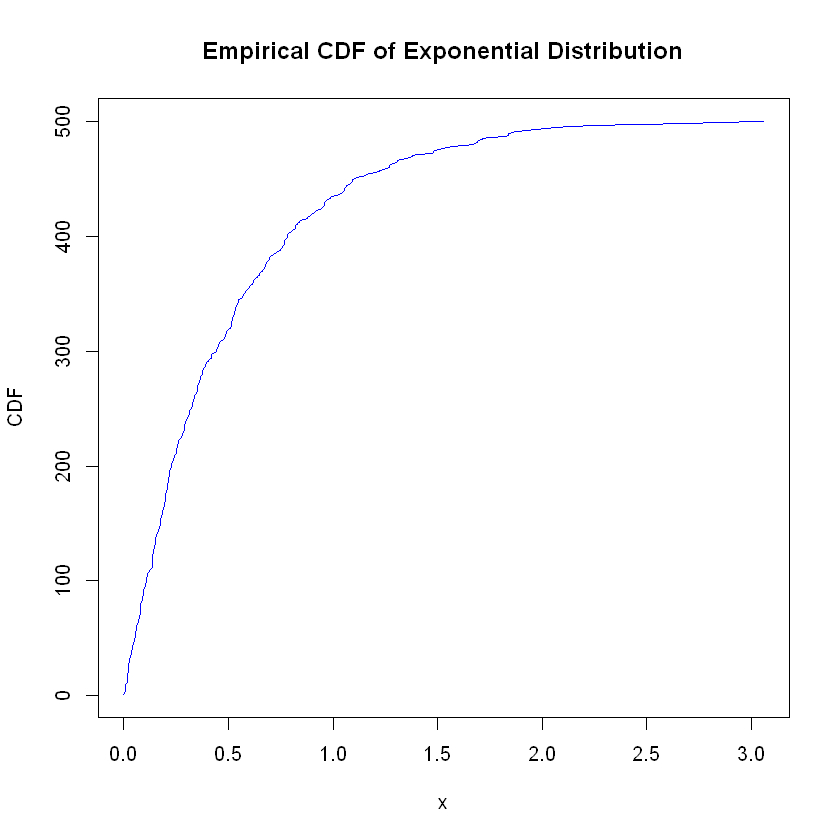

In [24]:
c_exp_dist_sort <- sort(c_exp_dist)
plot(c_exp_dist_sort, seq_along(c_exp_dist_sort), type = "l", col = "blue", xlab = "x", ylab = "CDF", main = "Empirical CDF of Exponential Distribution")

#### P(3<X<4)

In [25]:
pexp(4,2) - pexp(3,2)

[1] 0.00214329

# Simulating Discrete Random Variables

In [26]:
d_pois_dist<- rpois(500,3) # Generating Poisson Random Variables
d_bin_dist<- rbinom(500,10,0.5) # Generating Binomial Random Variables
disc_data <- as.data.frame(cbind(d_pois_dist,d_bin_dist))

## Poisson Distribution

In [27]:
disc_data %>% pull(d_pois_dist)%>% describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,500,3.082,1.839032,3,2.965,1.4826,0,10,10,0.5857424,0.4189691,0.08224403


In [28]:
poisson_quantile <- disc_data%>% pull(d_pois_dist)%>%interp.quart()

p1_quantile<- poisson_quantile[1]
p2_quantile<- poisson_quantile[2]
p3_quantile<- poisson_quantile[3]

cat('First Quantile',p1_quantile, '\n'); cat('Second Quantile',p2_quantile, '\n');cat('Third Quantile',p3_quantile)

First Quantile 1.75 
Second Quantile 2.947619 
Third Quantile 4.197917

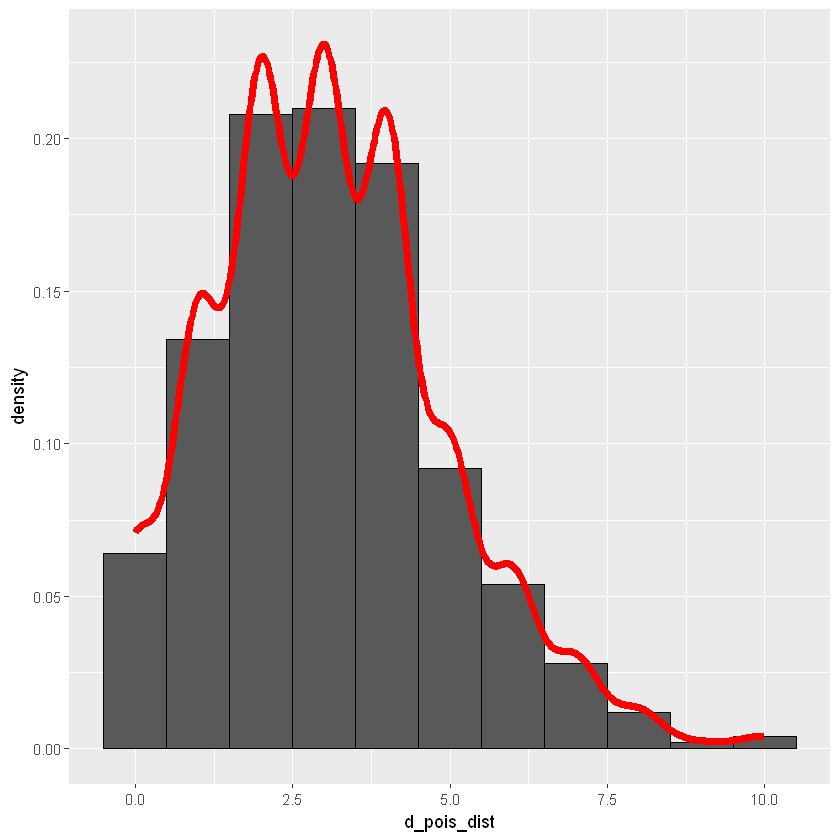

In [29]:
ggplot(disc_data, aes(x=d_pois_dist, y =after_stat(density)))+geom_histogram(binwidth=1, color='black') + geom_density(color='red', linewidth=2)

### Central Limit Theorem Verification

In [30]:
p_clt <- function(sample_size, no_of_sample_means) {
  mean_list <- c()
  for (i in 1:no_of_sample_means) {
    sample <- sample(disc_data%>% pull(d_pois_dist), size = sample_size, replace = FALSE)
    sample_mean <- mean(sample)
    mean_list <- c(mean_list, sample_mean)
  }
  return(mean_list)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


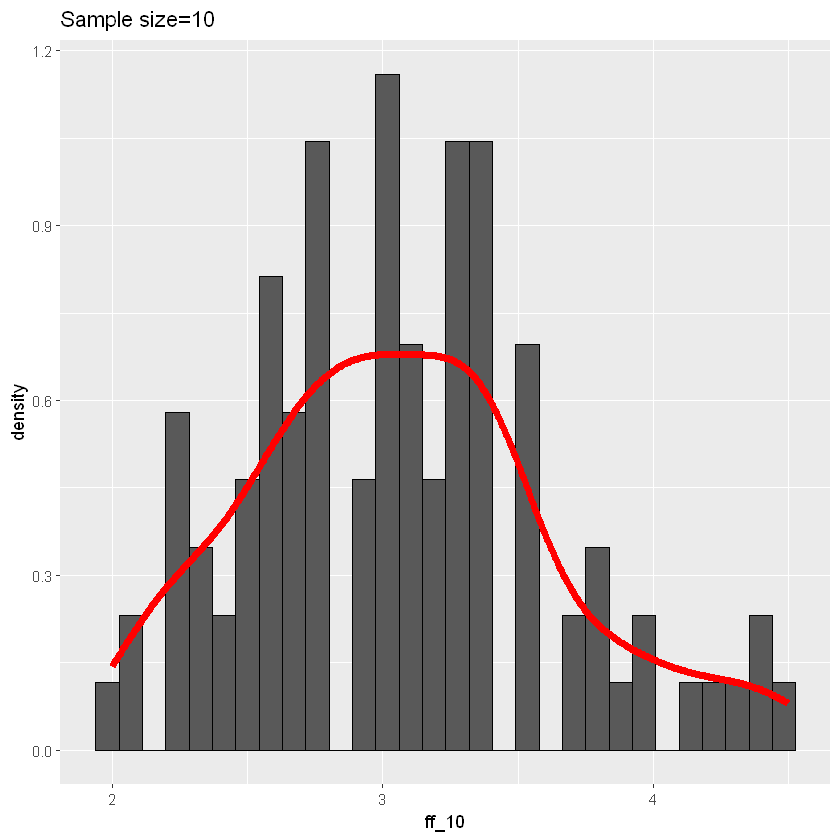

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


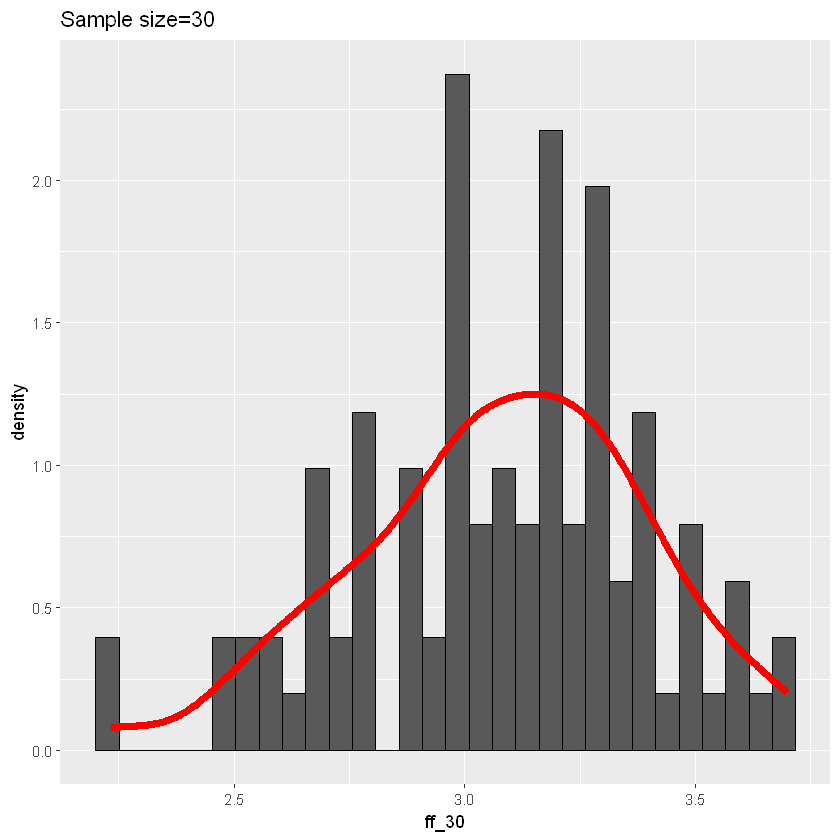

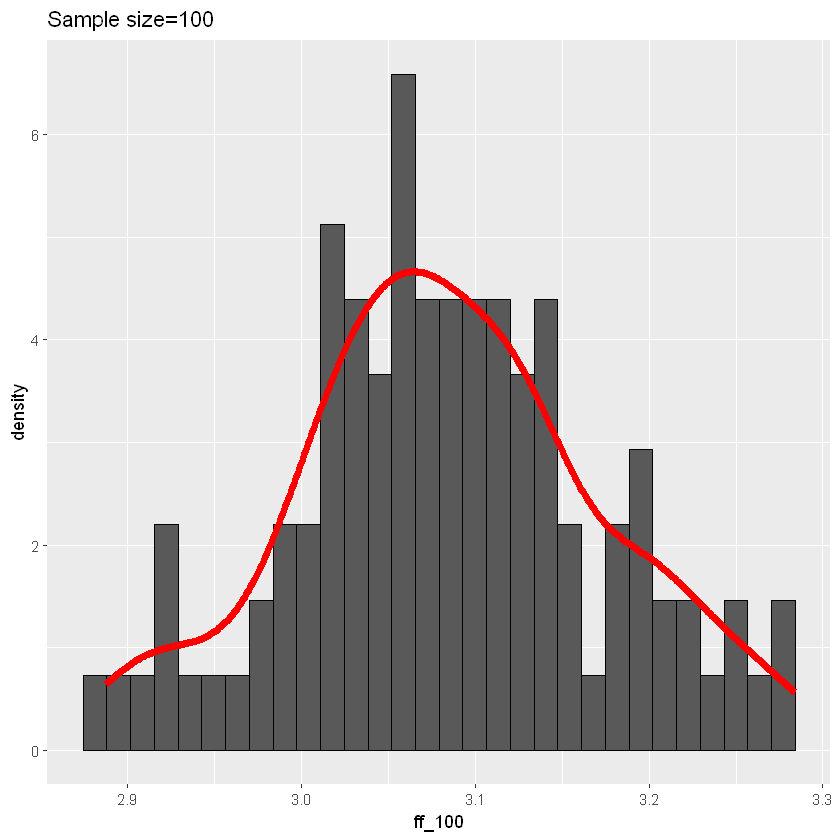

In [31]:
ff_10<- p_clt(10,100)
ff_30 <- p_clt(30,100)
ff_100<- p_clt(250,100)
clt_verify_p <- data.frame(ff_10,ff_30,ff_100)

ggplot(clt_verify_p, aes(x=ff_10,y=after_stat(density))) + geom_histogram(color='black')+ geom_density(color='red',linewidth=2)+labs(title='Sample size=10')
ggplot(clt_verify_p, aes(x=ff_30, y=after_stat(density))) +geom_histogram(color='black') + geom_density(color='red',linewidth=2)+labs(title='Sample size=30')
ggplot(clt_verify_p, aes(x=ff_100, y=after_stat(density))) +geom_histogram(color='black') + geom_density(color='red',linewidth=2)+labs(title='Sample size=100')

### Outlier Analysis

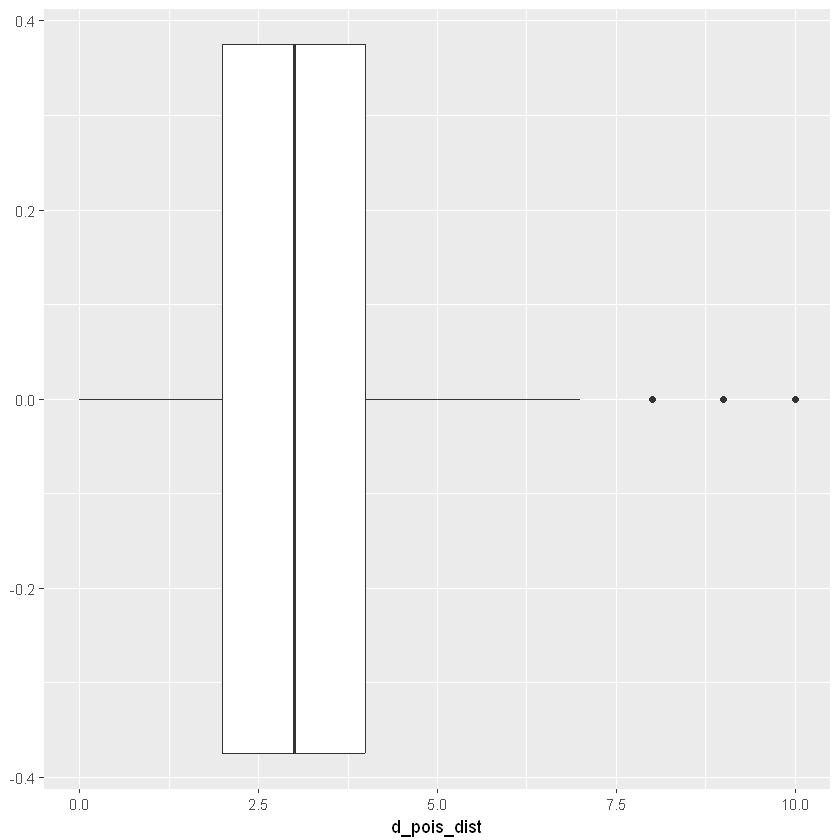

In [32]:
ggplot(disc_data, aes(x=d_pois_dist)) + geom_boxplot()

In [33]:
pois_iqr <- p3_quantile - p1_quantile
disc_data %>% pull(d_pois_dist) %>%.[(d_pois_dist<(p1_quantile-1.5*pois_iqr))|(d_pois_dist>(p3_quantile+1.5*pois_iqr))]

[1]  8 10  8  8  8  9  8 10  8

### Probability Calculations

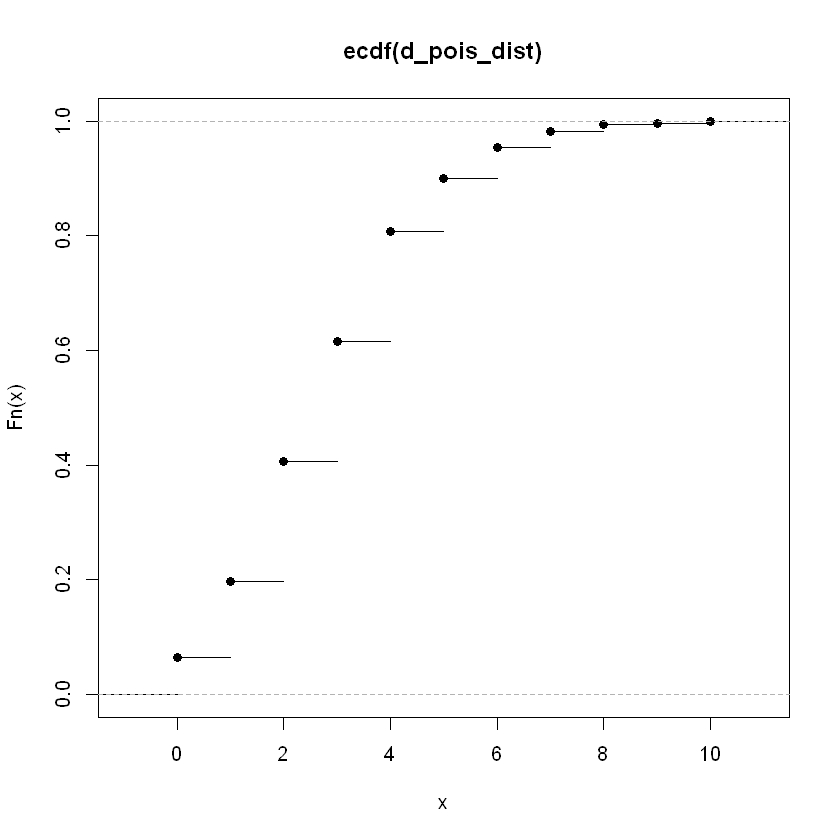

In [34]:
plot(ecdf(d_pois_dist)) 

#### P(x<= 1)

In [35]:
ppois(1,3)

[1] 0.1991483

#### P(x>=1)

In [36]:
ppois(1,3, lower.tail=FALSE)

[1] 0.8008517

## Binomial Distribution

In [37]:
disc_data %>% pull(d_bin_dist)%>% describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,500,5.146,1.598059,5,5.1575,1.4826,1,9,8,-0.06209972,-0.2413377,0.07146736


In [38]:
bin_quantile <- disc_data%>% pull(d_bin_dist)%>%interp.quart()

b1_quantile<- bin_quantile[1]
b2_quantile<- bin_quantile[2]
b3_quantile<- bin_quantile[3]

cat('First Quantile',b1_quantile, '\n'); cat('Second Quantile',b2_quantile, '\n');cat('Third Quantile',b3_quantile)

First Quantile 4.026882 
Second Quantile 5.175 
Third Quantile 6.254386

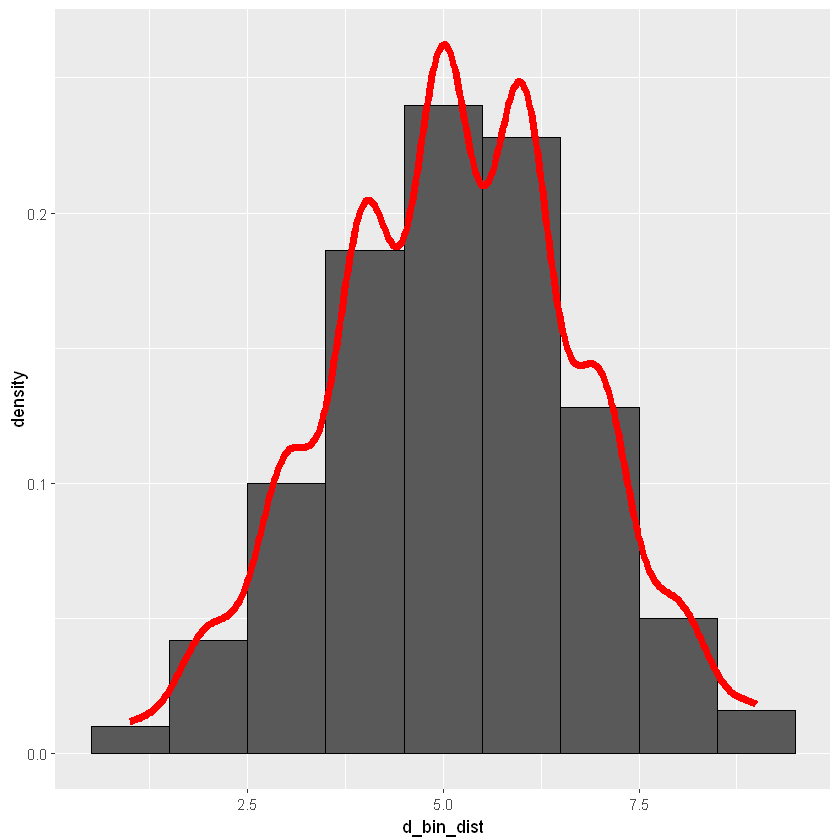

In [39]:
ggplot(disc_data, aes(x=d_bin_dist, y =after_stat(density)))+geom_histogram(binwidth=1, color='black') + geom_density(color='red', linewidth=2)

### Central Limit Theorem Verification 

In [40]:
b_clt <- function(sample_size, no_of_sample_means) {
  mean_list <- c()
  for (i in 1:no_of_sample_means) {
    sample <- sample(disc_data%>% pull(d_bin_dist), size = sample_size, replace = FALSE)
    sample_mean <- mean(sample)
    mean_list <- c(mean_list, sample_mean)
  }
  return(mean_list)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


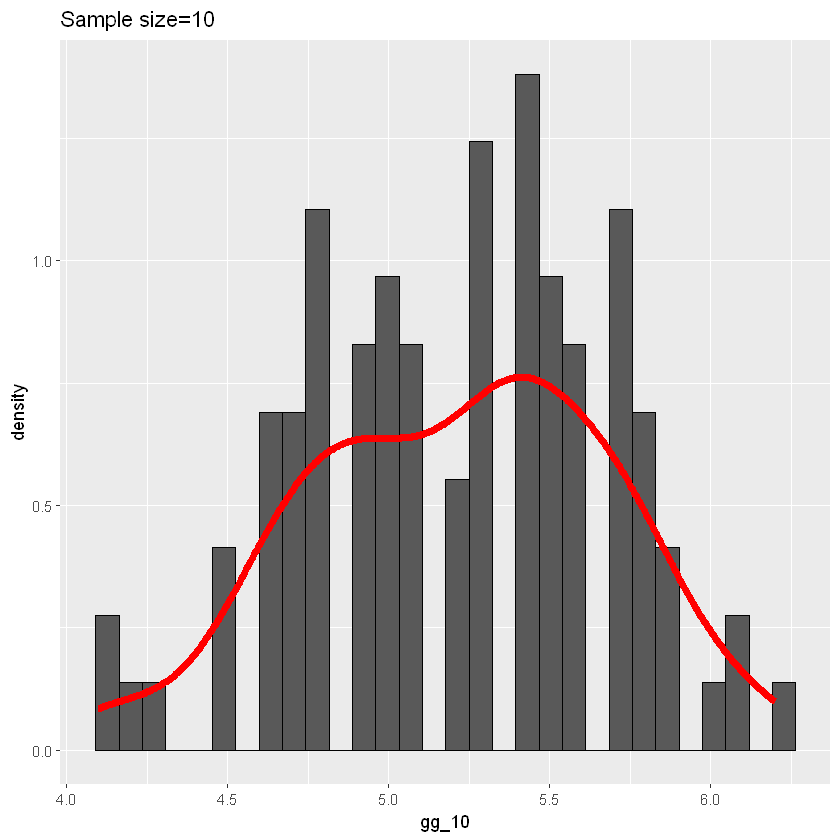

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


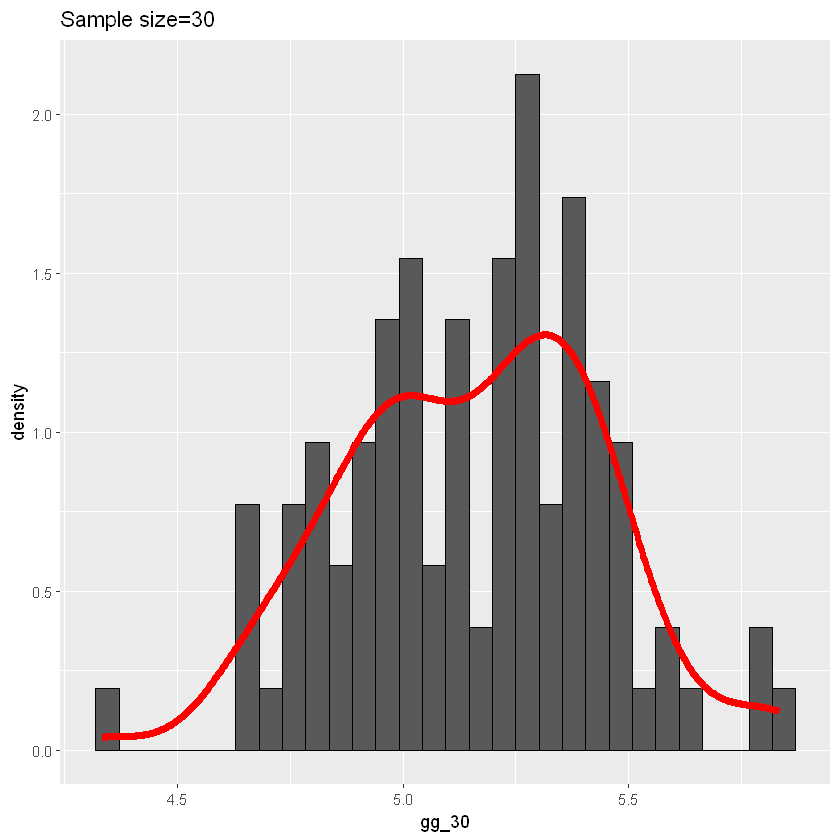

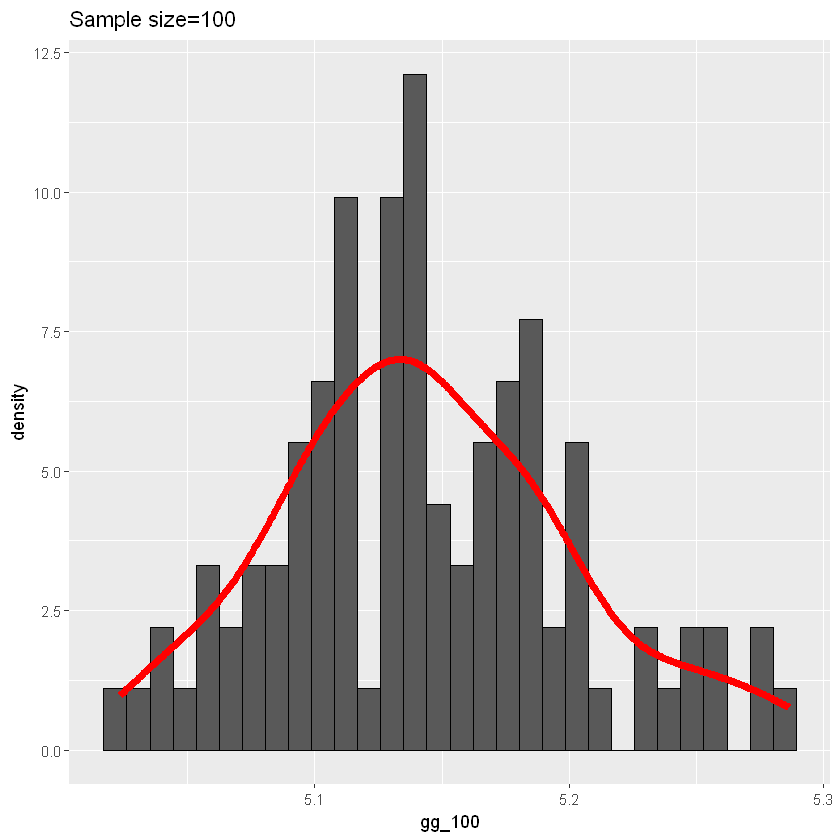

In [41]:
gg_10<- b_clt(10,100)
gg_30 <- b_clt(30,100)
gg_100<- b_clt(300,100)
clt_verify_b <- data.frame(gg_10,gg_30,gg_100)

ggplot(clt_verify_b, aes(x=gg_10,y=after_stat(density))) + geom_histogram(color='black')+ geom_density(color='red',linewidth=2)+labs(title='Sample size=10')
ggplot(clt_verify_b, aes(x=gg_30, y=after_stat(density))) +geom_histogram(color='black') + geom_density(color='red',linewidth=2)+labs(title='Sample size=30')
ggplot(clt_verify_b, aes(x=gg_100, y=after_stat(density))) +geom_histogram(color='black') + geom_density(color='red',linewidth=2)+labs(title='Sample size=100')

### Outlier Analysis

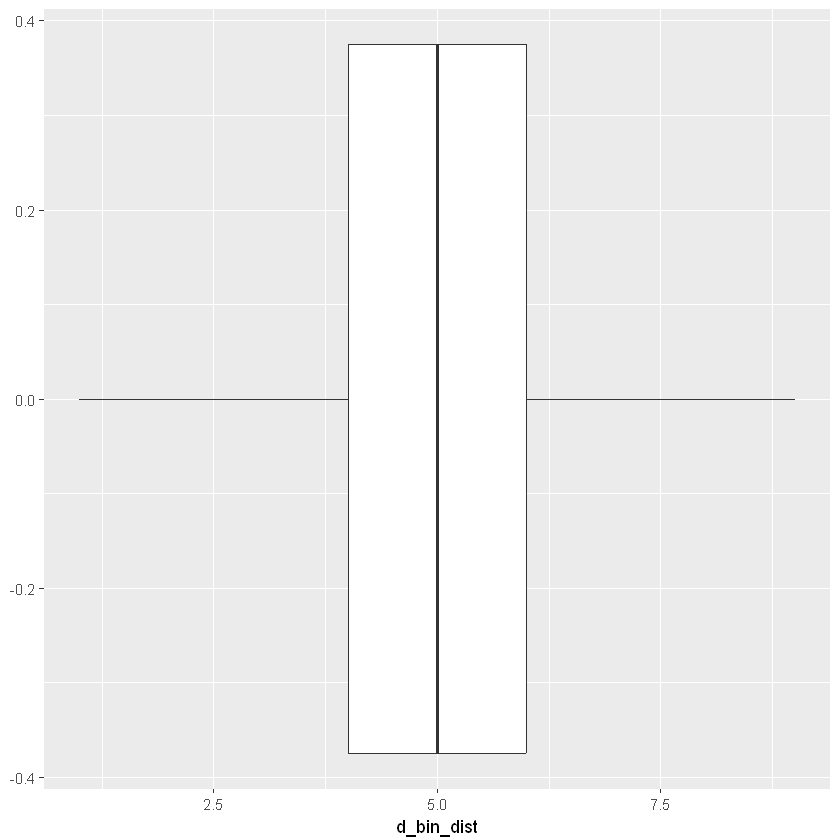

In [42]:
ggplot(disc_data, aes(x=d_bin_dist)) + geom_boxplot()

In [43]:
bin_iqr <- b3_quantile - b1_quantile
disc_data %>% pull(d_bin_dist) %>%.[(d_bin_dist<(b1_quantile-1.5*bin_iqr))|(d_bin_dist>(b3_quantile+1.5*bin_iqr))]

integer(0)

### Probability Calculations

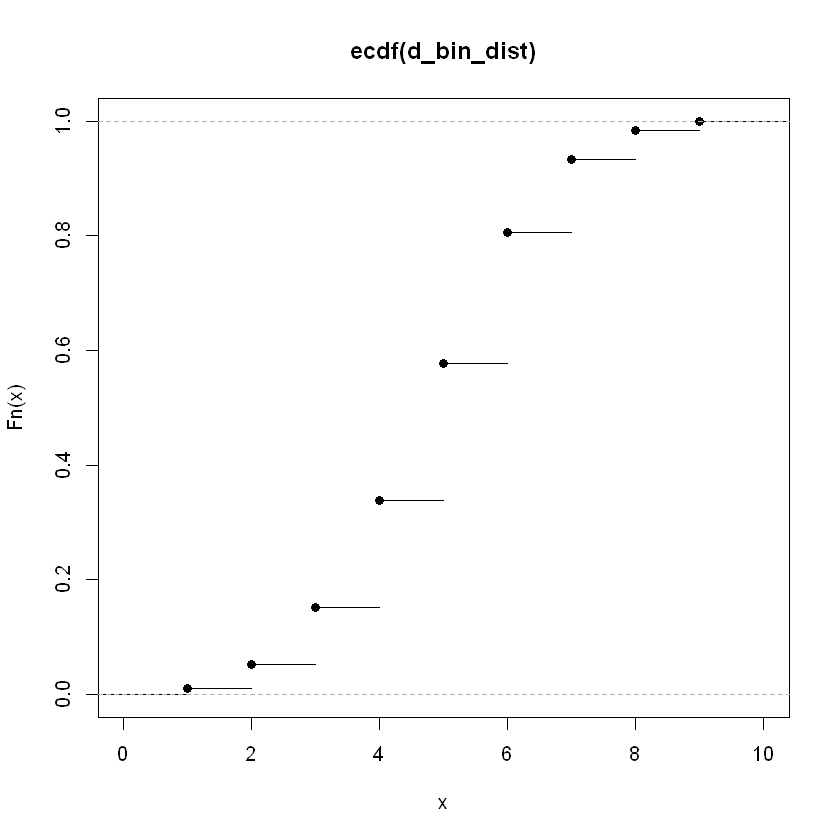

In [44]:
plot(ecdf(d_bin_dist))

#### P(X <= 67)

In [45]:
pbinom(67,10,0.5)

[1] 1

# Markov Chains

## A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in theprevious event.[

In [46]:
markov <- matrix(data = c(0.1,0.2,0.3,0.7,0.4,0.6,0.2,0.4,0.1), nrow=3,ncol=3, byrow=FALSE)

In [47]:
markov

0.1,0.7,0.2
0.2,0.4,0.4
0.3,0.6,0.1


In [48]:
length(markov)

[1] 9

### The transition matrix for a Markov chain is a stochastic matrix whose (i, j) entry gives the probability that an element moves from the state si to the state sj during the next step of the process. This probability does not depend upon which states the chain was in before the current state. The probabilities pij are called transition probabilities.

In [49]:
simulate_markov_chain <- function(transition_matrix, steps) {
  # Set the initial state to 0
  current_state <- 0
  
  # Initialize state probabilities to 0
  state_probabilities <- rep(0, nrow(transition_matrix))
  
  # Initialize the sequence with the initial state
  sequence <- current_state
  
  for (i in 1:steps) {
    # Update state probabilities
    state_probabilities[current_state + 1] <- state_probabilities[current_state + 1] + 1
    
    # Draw the next state based on the transition probabilities
    current_state <- sample(x = 0:(nrow(transition_matrix) - 1),
                            size = 1,
                            prob = transition_matrix[current_state + 1, ])
    
    # Append the new state to the sequence
    sequence <- c(sequence, current_state)
  }
  
  # Normalize state probabilities
  state_probabilities <- state_probabilities / steps
  
  return(list(sequence = sequence, probabilities = state_probabilities))
}

In [50]:
simulation_steps <- 15

# Simulate Markov chain
result <- simulate_markov_chain(markov, simulation_steps)

# Print the results
cat("Simulated State Sequence:\n")
print(result$sequence)

cat("\nSimulated State Probabilities:\n")
print(result$probabilities)

Simulated State Sequence:
 [1] 0 1 2 0 2 1 0 1 1 1 2 1 1 0 2 1

Simulated State Probabilities:
[1] 0.2666667 0.4666667 0.2666667


- This Simulation generates a sequence of states according to a given Markov chain transition matrix. It iterates through the specified number of steps, updating the current state based on transition probabilities and storing the resulting sequence. Additionally, it calculates the probabilities of each state occurring in the simulated sequence by normalizing the frequency of occurrence.

## Recurrent Events

In [51]:
RecurrentEvent <- R6::R6Class(
  "RecurrentEvent",
  public = list(
    markov = NULL,
    number_states = NULL,
    state = 0,
    initialize = function(transition_matrix) {
      self$markov <- transition_matrix
      self$number_states <- nrow(transition_matrix)
    },
    event = function() {
      next_state <- sample(x = 0:(self$number_states - 1),
                           size = 1,
                           prob = self$markov[self$state + 1, ])
      self$state <- next_state
    }
  )
)

recurrentmodel <- RecurrentEvent$new(markov)

# Simulate multiple events
num_simulations <- 15

for (i in 0:(recurrentmodel$number_states - 1)) {
  recurrentmodel$event()
  cat("Current State:", recurrentmodel$state, "\n")
}

Current State: 1 
Current State: 1 
Current State: 2 


### Recurrent events are for simulating events governed by a Markov chain. The class includes methods for initialization and generating events based on transition probabilities. It initializes with a transition matrix defining the probabilities of transitioning between states. The subsequent loop simulates multiple events, updating and displaying the current state at each step.

## Ergodicity

In [52]:
num_states <- 3

# Initial state
current_state <- sample(x = 0:(num_states - 1), size = 1)

num_steps <- 1000
sequences <- numeric(num_steps)
state_probabilities <- rep(0, num_states)

# Simulate Markov chain
for (i in 1:num_steps) {
  sequences[i] <- current_state
  current_state <- sample(x = 0:(num_states - 1),
                          size = 1,
                          prob = markov[current_state + 1, ])
}

for (sequence in sequences) {
  state_probabilities[sequence + 1] <- state_probabilities[sequence + 1] + 1
}

state_probabilities <- state_probabilities / length(sequences) # Time-averaged behavior

# Calculate stationary distribution (also known as equilibrium distribution)
stationary_distribution <- markov %^% 1000

# Display results
cat("Empirical Probabilities:", state_probabilities, "\n")
cat("Stationary Distribution:", stationary_distribution[, 1], "\n")

Empirical Probabilities: 0.216 0.505 0.279 
Stationary Distribution: 0.2068966 0.2068966 0.2068966 


### Ergodicity is a property of Markov chains where over time, the system explores all possible states and converges to a stationary distribution. Ergodicity is illustrated by simulating the Markov chain over a large number of steps and observing the convergence of the empirical probabilities towards the stationary distribution. This convergence indicates that regardless of the initial state, the system reaches a state where the probabilities no longer change with further iterations, reflecting the long-term behavior of the Markov chain.

## Sensitivity Analysis

Simulated State Sequence:
 [1] 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 2

Simulated State Probabilities:
[1] 0.4 0.6 0.0


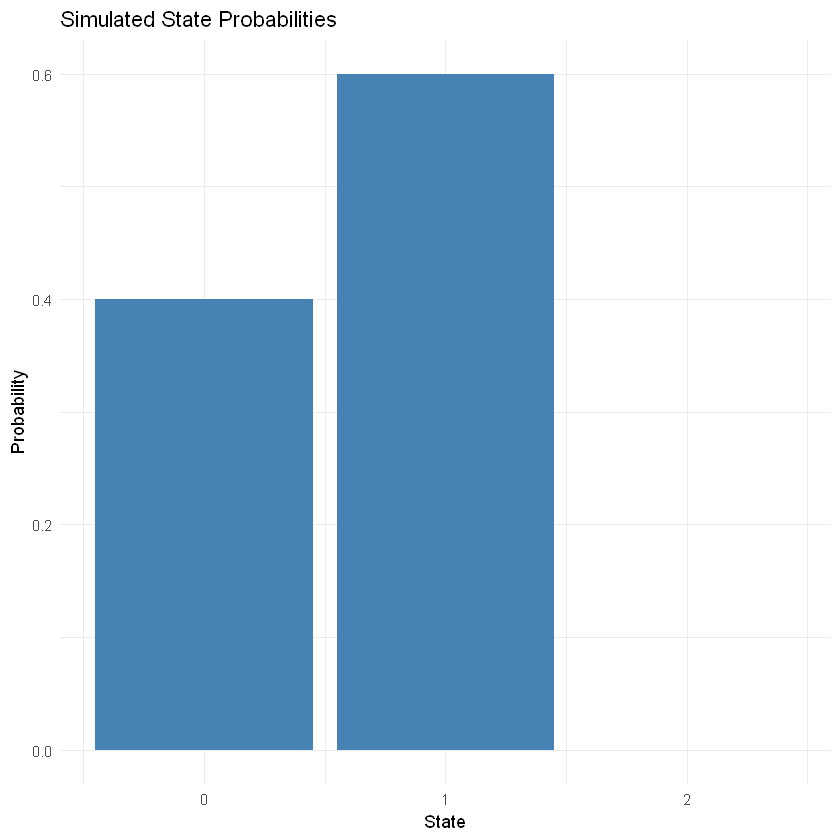

In [53]:
simulate_markov_chain <- function(markov, steps) {
  # Set the initial state to 0
  current_state <- 0
  
  # Initialize state probabilities to 0
  state_probabilities <- rep(0, nrow(markov))
  
  # Initialize the sequence with the initial state
  sequence <- current_state
  
  for (i in 1:steps) {
    # Update state probabilities
    state_probabilities[current_state + 1] <- state_probabilities[current_state + 1] + 1
    
    # Draw the next state based on the transition probabilities
    current_state <- sample(x = 0:(nrow(markov) - 1),
                            size = 1,
                            prob = markov[current_state + 1, ])
    
    # Append the new state to the sequence
    sequence <- c(sequence, current_state)
  }
  
  # Normalize state probabilities
  state_probabilities <- state_probabilities / steps
  
  return(list(sequence = sequence, probabilities = state_probabilities))
}

# Define the transition matrix with diagonal elements zero
markov <- matrix(c(0.0, 0.9, 0.1,
                   0.8, 0.2, 0.0,
                   0.0, 0.0, 1.0),
                 nrow = 3, ncol = 3, byrow = TRUE)

# Number of simulation steps
simulation_steps <- 15

# Simulate Markov chain
result <- simulate_markov_chain(markov, simulation_steps)

# Print the results
cat("Simulated State Sequence:\n")
print(result$sequence)

cat("\nSimulated State Probabilities:\n")
print(result$probabilities)

# Plot the state probabilities
state_probs_df <- data.frame(State = 0:(nrow(markov) - 1),
                             Probability = result$probabilities)

ggplot(state_probs_df, aes(x = State, y = Probability)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Simulated State Probabilities",
       x = "State",
       y = "Probability") +
  theme_minimal()

- The transition matrix of the Markov chain is defined, where diagonal elements are set to zero, likely indicating transitions with no probability of remaining in the same state. The function `simulate_markov_chain`  generates a sequence of states based on the transition probabilities.I have also illustrated the distribution of states over the simulation steps, providing insights into the dynamics of the Markov chain.

## Visualization

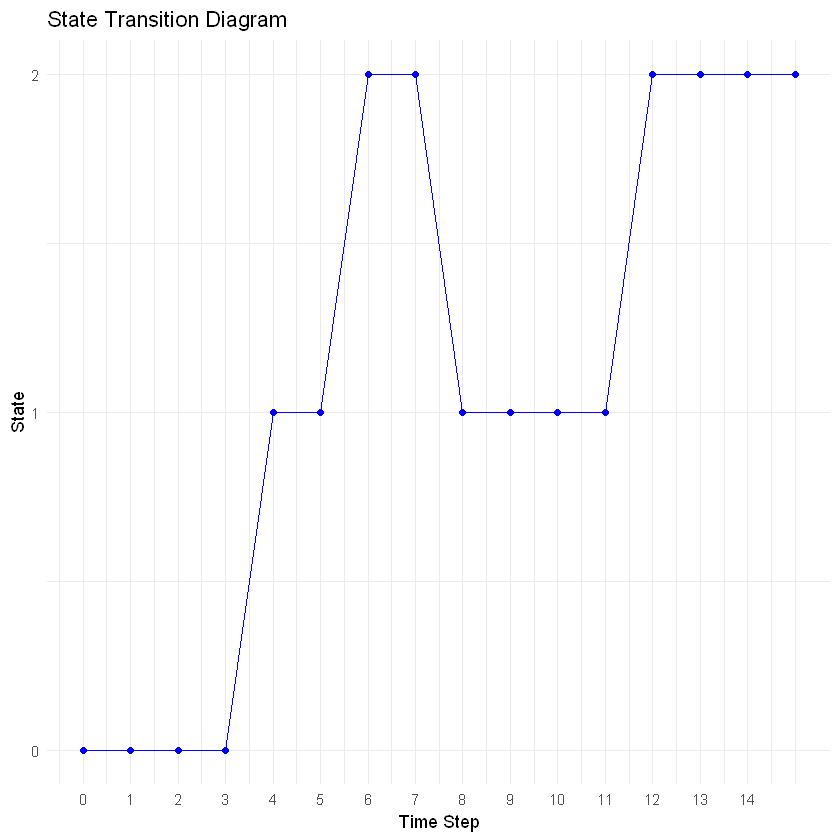

In [54]:
simulate_markov_chain <- function(markov, steps) {
  # Set the initial state to 0
  current_state <- 0
  
  # Initialize state probabilities to 0
  state_probabilities <- rep(0, nrow(markov))
  
  # Initialize the sequence with the initial state
  sequence <- current_state
  
  for (i in 1:steps) {
    # Update state probabilities
    state_probabilities[current_state + 1] <- state_probabilities[current_state + 1] + 1
    
    # Draw the next state based on the transition probabilities
    current_state <- sample(x = 0:(nrow(markov) - 1),
                            size = 1,
                            prob = markov[current_state + 1, ])
    
    # Append the new state to the sequence
    sequence <- c(sequence, current_state)
  }
  
  return(sequence)
}

# Define the transition matrix
markov <- matrix(c(0.7, 0.2, 0.1,
                   0.1, 0.6, 0.3,
                   0.2, 0.3, 0.5),
                 nrow = 3, ncol = 3, byrow = TRUE)

# Number of simulation steps
simulation_steps <- 15

# Simulate Markov chain
result <- simulate_markov_chain(markov, simulation_steps)

# Create a data frame for plotting
plot_data <- data.frame(Time = 0:(length(result) - 1), State = result)

# Plot the state transition diagram
ggplot(plot_data, aes(x = Time, y = State)) +
  geom_line(color = "blue") +
  geom_point(color = "blue", shape = 16) +
  labs(title = "State Transition Diagram",
       x = "Time Step",
       y = "State") +
  scale_x_continuous(breaks = 0:14) +
  scale_y_continuous(breaks = 0:2) +
  theme_minimal()

### This is a simple Markov chain with three states over 15 time steps. Each step involves transitioning to the next state based on predefined transition probabilities. I have also plotted the results show how the system moves between states over time.



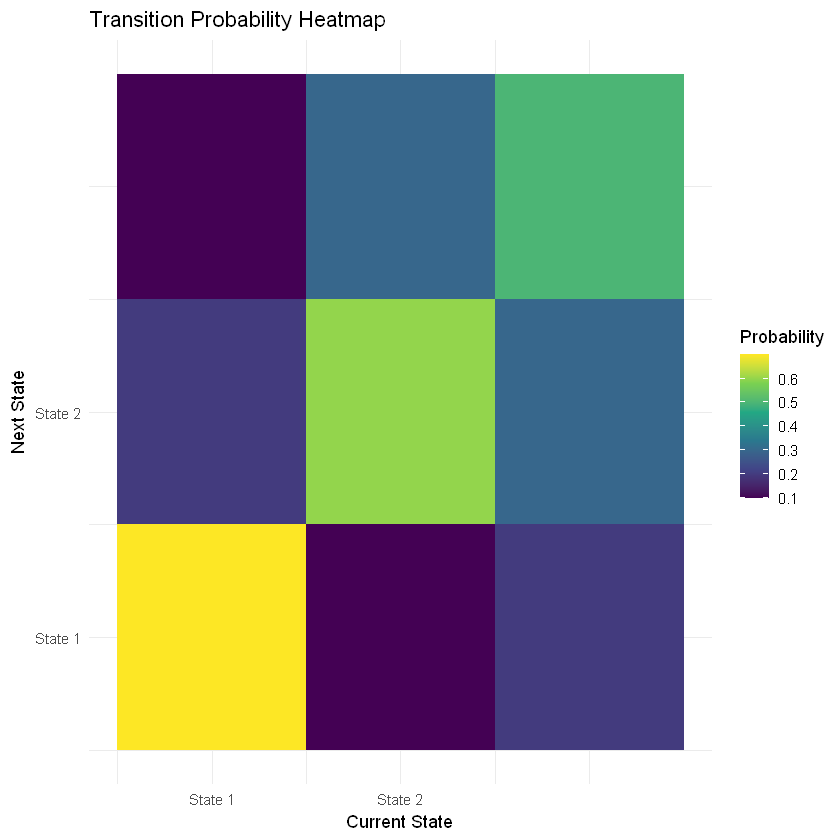

In [55]:
markov_df <- reshape2::melt(markov)
colnames(markov_df) <- c("Current_State", "Next_State", "Probability")

# Plot the heatmap
ggplot(markov_df, aes(x = Current_State, y = Next_State, fill = Probability)) +
  geom_tile() +
  scale_fill_viridis_c() +
  labs(title = "Transition Probability Heatmap",
       x = "Current State",
       y = "Next State",
       fill = "Probability") +
  scale_x_continuous(breaks = 0:2, labels = c("State 0", "State 1", "State 2")) +
  scale_y_continuous(breaks = 0:2, labels = c("State 0", "State 1", "State 2")) +
  theme_minimal()

### I have visualized the transition probabilities of a Markov chain as a heatmap. The heatmap, where each cell color represents the transition probability from the current state to the next state. This visualization offers a clear representation of how likely transitions are between different states in the Markov chain.

# Variance Reduction Techniques

In [56]:
# Target function
target_function <- function(x) {
  return(x^2)
}

# Simulation without variance reduction techniques
simulation <- function(number_of_samples) {
  samples <- runif(number_of_samples, min = 0, max = 1) # Simulating Uniform Random variable
  estimates <- target_function(samples)
  return(mean(estimates))
}

# Importance sampling
importance_sampling <- function(number_of_samples) {
  samples <- rnorm(number_of_samples, mean = 0.5, sd = 0.1)
  weights <- 1 / (sqrt(2 * pi) * exp(-0.5 * (samples - 0.5)^2))
  estimates <- target_function(samples) * weights / mean(weights)
  return(var(estimates))
}

# Control variates
control_variates <- function(number_of_samples) {
  control_variate <- runif(number_of_samples, min = 0, max = 1)
  samples <- runif(number_of_samples, min = 0, max = 1)
  estimates <- target_function(samples) - 0.5 * (control_variate - 0.5)
  return(var(estimates))
}

# Antithetic variates
antithetic_variates <- function(num_samples) {
  antithetic_samples <- c(runif(num_samples, min = 0, max = 1),
                          1 - runif(num_samples, min = 0, max = 1))
  estimates <- target_function(antithetic_samples)
  return(var(estimates))
}

In [57]:
number_of_samples <- 10000

simple_estimation <- simulation(number_of_samples)
importance_sampling_estimation <- importance_sampling(number_of_samples)
control_variates_estimation <- control_variates(number_of_samples)
antithetic_variates_estimation <- antithetic_variates(number_of_samples)

cat("Simple Estimation:", simple_estimation, "\n")
cat("Importance Sampling Estimation:", importance_sampling_estimation, "\n")
cat("Control Variates Estimation:", control_variates_estimation, "\n")
cat("Antithetic Variates Estimation:", antithetic_variates_estimation, "\n")

Simple Estimation: 0.337166 
Importance Sampling Estimation: 0.01042008 
Control Variates Estimation: 0.108539 
Antithetic Variates Estimation: 0.08901428 


# Comparision of Different Simulation Methods

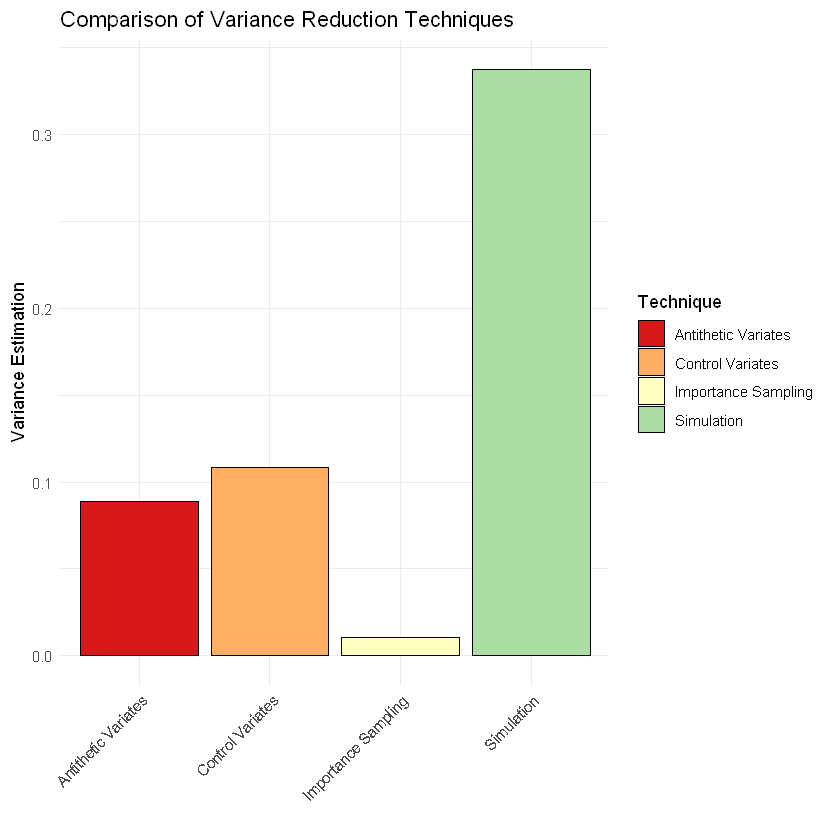

In [58]:
labels <- c("Simulation", "Importance Sampling", "Control Variates", "Antithetic Variates")
estimations <- c(simple_estimation, importance_sampling_estimation, control_variates_estimation, antithetic_variates_estimation)

# Create a data frame for plotting
plot_data <- data.frame(Technique = labels, Estimation = estimations)

# Define a color palette
colors <- brewer.pal(5, "Spectral")

# Plot the bar chart
ggplot(plot_data, aes(x = Technique, y = Estimation, fill = Technique)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Comparison of Variance Reduction Techniques",
       x = "",
       y = "Variance Estimation") +
  scale_fill_manual(values = colors) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`importance_sampling` applies importance sampling, using normally distributed samples centered around 0.5 as importance weights to enhance estimation precision.

`control_variates` employs control variates, where a related random variable's value (also uniformly distributed) is subtracted from each sample to reduce variance.

`antithetic_variates` generates antithetic variates by pairing uniform random samples with their complements to exploit the symmetry of the function and mitigate variance.

`simulation` performs a straightforward simulation without any variance reduction techniques by generating uniform random samples and averaging the function values.

Finally, The results are plotted to compare the different variance reduction techniques.

# Simulation for Combinatorial Analysis

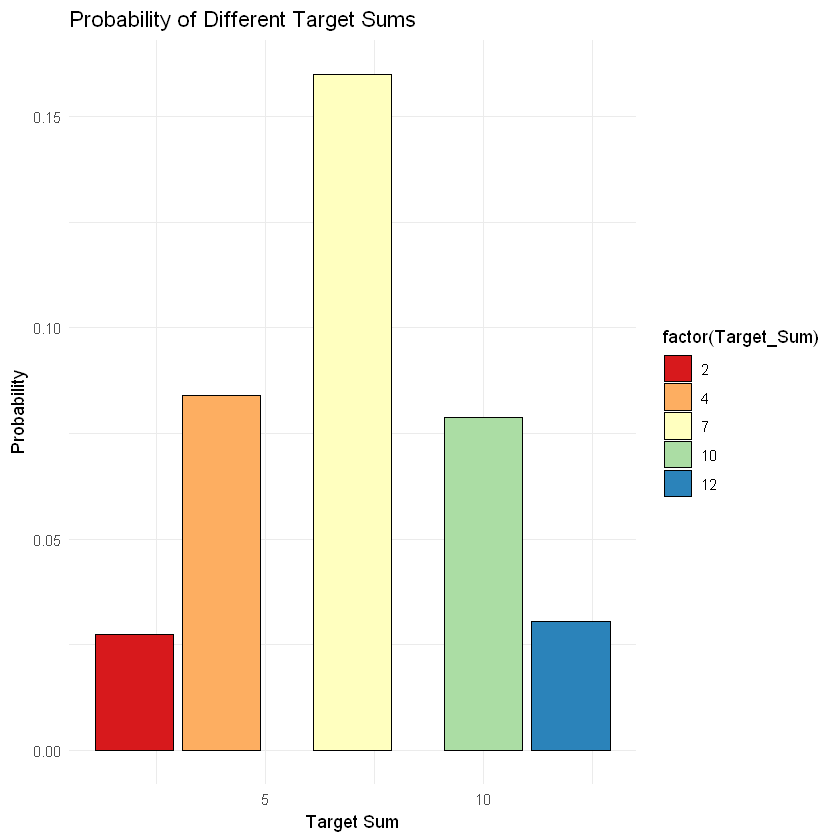

In [59]:
no_of_simulations <- 10000

# Roll two dice
rolls <- matrix(sample(1:6, no_of_simulations * 2, replace = TRUE), ncol = 2)

# Calculate the sum of the two dice
sums <- rowSums(rolls)

target_sums <- c(2, 4, 7, 10, 12)

# Calculate the occurrences of target sums
occur_target_sums <- sapply(target_sums, function(target_sum) sum(sums == target_sum))

# Calculate the probabilities for each target sum
probabilities <- occur_target_sums / no_of_simulations

# Create a data frame for plotting
plot_data <- data.frame(
  Target_Sum = target_sums,
  Probability = probabilities
)

# Define a color palette
colors <- brewer.pal(length(target_sums), "Spectral")

# Plot the bar chart
ggplot(plot_data, aes(x = Target_Sum, y = Probability, fill = factor(Target_Sum))) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Probability of Different Target Sums",
       x = "Target Sum",
       y = "Probability") +
  scale_fill_manual(values = colors) +
  theme_minimal()

# Real Data Analysis 

## Bayes Theorem

### Bayes' theorem is a fundamental concept in probability theory and statistics, It relates the conditional probabilities of two events, allowing us to calculate the probability of one event given the occurrence of another event.

#### Here we have a dataset and we are going to focus on two variables here.
#### tips -> This contains data of the Tips given by passengers to Taxi drivers in Chicago
#### daytype -> This contains data of day being Weekday or Weekend.

#### Our Research question is to find out if Passengers Tip High amount given that It is a weekend. We will use Bayes's Theorem to find out the Probability of this. 

- Here, we first load the dataset to an object.

In [60]:
chicago_cab <- read_xlsx('datasets/chicago_taxi.xlsx')
head(chicago_cab)

date,daytype,seconds,miles,tips,total,payment_type,speed
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2019-09-09,weekday,601,1.56,2,10.25,Credit,9.344426
2019-08-29,weekday,346,0.73,2,8.25,Credit,7.595376
2019-02-22,weekend,931,3.29,0,13.75,Cash,12.721805
2019-05-30,weekday,252,0.70,0,5.25,Cash,10.000000
2019-07-21,weekday,393,1.12,0,7.25,Cash,10.259542
2019-11-30,weekend,1320,1.10,1,46.25,Credit,3.000000


In [61]:
categorize_tips <- function(tips) {
    median_tip <- median(tips, na.rm = TRUE)
    categories <- ifelse(tips > median_tip, "High", "Low")
    return(categories)
}
# Apply the function to categorize tips
tip_bin <- data.frame(tips=categorize_tips(chicago_cab$tips))
tip_bin <- ifelse(tip_bin$tips == "High",1,0)
daytype_bin <- ifelse(chicago_cab$daytype == 'weekday', 0, 1)

- The tips data is numerical, In order to make it useful in bayes theorem we will categorize the tips into High and low. Then, I have converted them into binary where
- High tip given is assigned '1' and Low Tip given is assigned '0'
- I have also categorized daytype Weekday or weekend as '0' and '1' respectively.

In [62]:
chicago_data <- data.frame(chicago_cab,daytype_bin,tip_bin)
summary(chicago_data$tips)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.985   2.600  58.100 

#### Now we apply Bayes's formula

P(A|B) = (P(B|A) * P(A)) / P(B)

P(A|B) is the conditional probability of event A occurring given that event B has occurred (posterior probability
.
P(B|A) is the conditional probability of event B occurring given that event A has occurred (likelihoo
).
P(A) is the prior probability of event A occurring before considering even
 B.
P(B) is the probability of event B occurring.

In [63]:
tip <- chicago_data$tip_bin
day <- chicago_data$daytype_bin

#P(A)
prob_a <- sum(tip == 1) / nrow(chicago_data)
#P(B)
prob_b <- sum(day == 1) / nrow(chicago_data)

#P(B|A)
prob_b_given_a <- sum(day[tip == 1] == 1) / sum(tip == 1)
#P(A|B) Bayes Theorem
prob_a_given_b <- (prob_b_given_a * prob_a) / prob_b

#### prob_a: The prior probability of getting a high tip.
#### prob_b: The probability of it being a weekend day.
#### prob_b_given_a: The probability of it being a weekend day, given that a high tip was received.
#### I used Bayes' Theorem to calculate prob_a_given_b, which is the probability of getting a high tip, given that it is a weekend day. The formula is:
#### prob_a_given_b = (prob_b_given_a * prob_a) / prob_b

In [64]:
cat(round(prob_a_given_b,2) * 100,'%') # output of the probability

46 %

### The answer to our research question that Do Taxi Drivers get tipped more by a passenger during a weekend?
### Answer: The probability  of High tips given it is a weekend is: 46 percent.

## Joint Distribution Analysis

In [65]:
cor(data.frame(chicago_data$daytype_bin,chicago_data$tip_bin))

,chicago_data.daytype_bin,chicago_data.tip_bin
chicago_data.daytype_bin,1.00000000,-0.04006053
chicago_data.tip_bin,-0.04006053,1.00000000


#### The correlation coefficient of -0.04006053 suggests a very weak negative linear relationship between daytype_bin and tip_bin. This means that as the values of one variable increase, the values of the other variable tend to decrease slightly, but the relationship is quite weak.

In [66]:
joint_table <- table(chicago_data$daytype_bin, chicago_data$tip_bin)
joint_matrix <- as.matrix(joint_table)
joint_probabilities <- joint_matrix / sum(joint_matrix)
print(joint_probabilities)

   
            0         1
  0 0.3557560 0.3608775
  1 0.1532640 0.1301024


- The probability of daytype_bin being 0 and tip_bin being 0 is 0.3557560.
- The probability of daytype_bin being 0 and tip_bin being 1 is 0.3608775.
- The probability of daytype_bin being 1 and tip_bin being 0 is 0.1532640.
- The probability of daytype_bin being 1 and tip_bin being 1 is 0.1301024.



In [67]:
0.3557560+0.3608775+0.1532640+0.1301024

[1] 0.9999999

- The sum of all probabilities in the matrix is 0.9999999 (due to rounding), which is approximately 1, as expected for a valid joint probability distribution.

## Factor Analysis

### Factor analysis is a statistical method used to describe variability among observed, correlated variables potentially lower the number of variables called factors.

In [68]:
ptech <- read.csv('datasets/ptechdata.csv')

# Lets split the data and remove the id variable
pdat1 <- ptech[ptech$id==1,-1] 
pdat2 <- ptech[ptech$id==2,-1]

- We first import the dataset and There are 2 samples in the data - designated by `id`. We split the data into two sample and then remove the id variable.
- Lets have a quick look at the first sample and the descriptives of the data.

In [69]:
head(pdat1,10)

,v1,v2,v3,v4,v5,v6,v7,v8,v9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.84,-0.27,-0.59,-0.97,-0.72,-1.86,1.11,0.46,0.09
2,-0.04,-0.33,-0.54,2.57,1.30,0.59,1.42,2.56,0.66
3,0.34,-0.23,0.99,-1.84,-1.62,-1.55,1.05,0.22,0.60
4,-1.01,-1.96,-1.17,-2.93,-1.75,-1.89,-0.51,-0.07,1.14
5,2.02,0.21,0.97,0.13,-0.01,-0.88,-1.22,0.54,-0.28
6,-0.24,-0.19,0.23,0.80,1.06,1.61,1.31,-1.10,0.26
7,-0.61,-1.37,0.15,-0.68,-1.50,-0.44,-1.63,1.40,1.79
8,-1.26,-2.59,-1.10,-0.40,-0.66,0.29,-1.45,-1.06,0.15
9,0.23,0.25,-0.21,0.23,-0.42,1.01,0.15,1.16,-0.36


In [70]:
describe(pdat1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
v1,1,100,0.0036,0.9515416,0.025,-0.002250,0.956277,-2.33,2.44,4.77,0.03563877,-0.4140241,0.09515416
v2,2,100,-0.1402,0.9681597,-0.110,-0.115000,0.896973,-2.59,2.07,4.66,-0.21388345,-0.2137232,0.09681597
v3,3,100,0.0424,0.9120153,0.090,0.084125,0.904386,-3.11,2.10,5.21,-0.45970256,0.7226742,0.09120153
v4,4,100,-0.1316,0.9340265,-0.055,-0.113750,0.926625,-2.93,2.57,5.50,-0.15086419,0.2136506,0.09340265
v5,5,100,-0.1780,0.8548070,-0.290,-0.199125,0.830256,-2.04,1.75,3.79,0.25400184,-0.3133523,0.08548070
v6,6,100,-0.0135,0.9769189,0.065,0.011250,0.808017,-2.37,2.24,4.61,-0.20725618,-0.3375794,0.09769189
v7,7,100,0.1181,0.9389923,0.125,0.116375,1.015581,-1.91,2.14,4.05,0.03791245,-0.6766951,0.09389923
v8,8,100,-0.0282,1.0353006,0.000,-0.026125,0.926625,-2.58,2.56,5.14,-0.05226551,-0.3196236,0.10353006
v9,9,100,0.1657,0.9594582,0.265,0.181125,0.934038,-2.54,2.47,5.01,-0.19595994,-0.1689990,0.09594582


- Data appear to already be in standardized form.

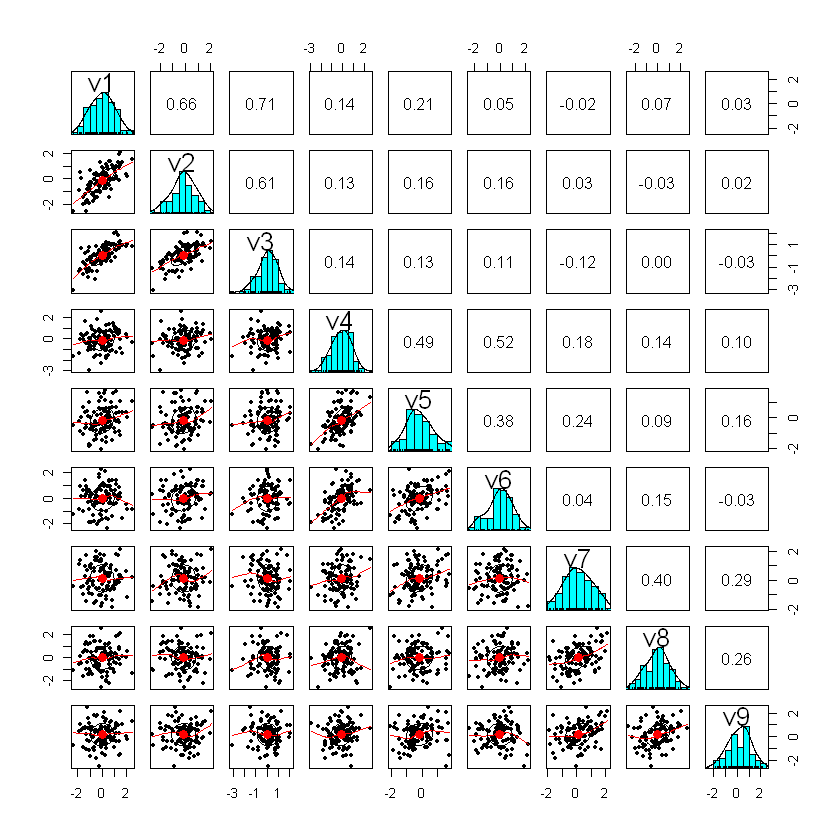

In [71]:
pairs.panels(pdat1)

-  The `pairs.panels()` function in R generates a matrix of scatterplots for every pair of variables in the data frame pdat1. This visualizes the relationships between all the variables, allowing for the identification of patterns, correlations, and potential outliers in the data.

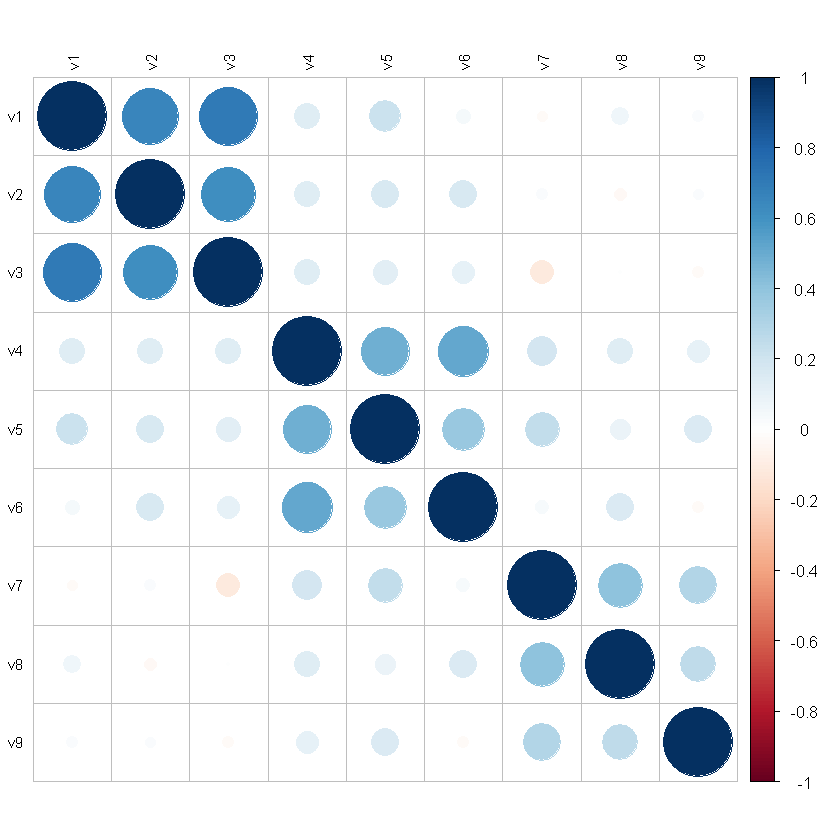

In [72]:
corrplot(cor(pdat1), order = "original", tl.col='black', tl.cex=.75) 

- We see three “groups” of variables that are High positively correlated.  Many of these correlations are close to zero, represented by the light gray circles.
- - Now we store the correlation matrix of the data into an object.

In [73]:
corpdat1 <- cor(pdat1, use="pairwise.complete.obs")
corpdat1

,v1,v2,v3,v4,v5,v6,v7,v8,v9
v1,1.00000000,0.65976178,0.707293038,0.1384304,0.21243923,0.04765664,-0.02354195,0.068595180,0.02845927
v2,0.65976178,1.00000000,0.611290349,0.1317872,0.16188108,0.16125106,0.02976057,-0.034583485,0.02415579
v3,0.70729304,0.61129035,1.000000000,0.1373615,0.12634369,0.10552785,-0.11698288,0.002804632,-0.02947128
v4,0.13843038,0.13178718,0.137361546,1.0000000,0.48822168,0.51674523,0.18083704,0.139804599,0.10261085
v5,0.21243923,0.16188108,0.126343694,0.4882217,1.00000000,0.37730021,0.24081229,0.089663855,0.15878760
v6,0.04765664,0.16125106,0.105527848,0.5167452,0.37730021,1.00000000,0.03741838,0.153838758,-0.02887585
v7,-0.02354195,0.02976057,-0.116982880,0.1808370,0.24081229,0.03741838,1.00000000,0.401410299,0.29346736
v8,0.06859518,-0.03458348,0.002804632,0.1398046,0.08966386,0.15383876,0.40141030,1.000000000,0.25623468
v9,0.02845927,0.02415579,-0.029471278,0.1026108,0.15878760,-0.02887585,0.29346736,0.256234679,1.00000000


- We are using `fa.parallel()` in the psych package. We can inform our choice of number of factors.

Parallel analysis suggests that the number of factors =  3  and the number of components =  NA 


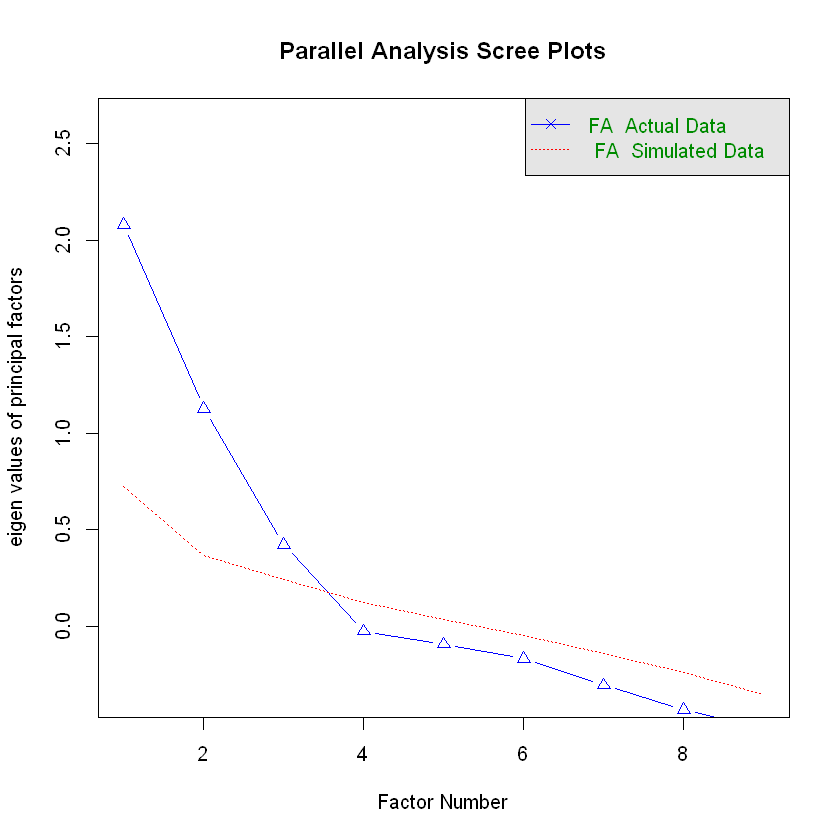

In [74]:
fa.parallel(x=corpdat1, fm="minres", fa="fa")

In [75]:
nScree(x=corpdat1,model="factors")

  noc naf nparallel nkaiser
1   3   3         3       3

#### Let's first discuss what are noc, naf,nparallel and nkaiser here;
- Optimal Coordinates (noc): This method tries to find the number of factors that best represents the relationships between the variables in the data.
-  Acceleration Factor (naf): It looks for a sudden drop or "elbow" in the pattern of eigenvalues, which suggests the number of important factors to keep.
-  Parallel Analysis (nparallel): It compares the eigenvalues from the actual data to those from random data. The number of factors to retain is determined by where the actual data's eigenvalues start to be larger than the random data's eigenvalues.
-  Kaiser Rule (nkaiser): This simple rule says to keep all factors that have an eigenvalue greater than 1, as eigenvalues less than 1 don't explain much of the variability in the data.


The output here is number of components/factors according to optimal coordinates (noc), acceleration factor (naf), parallel analysis (nparallel), and Kaiser rule (nkaiser).

- Lets plot this scree results.

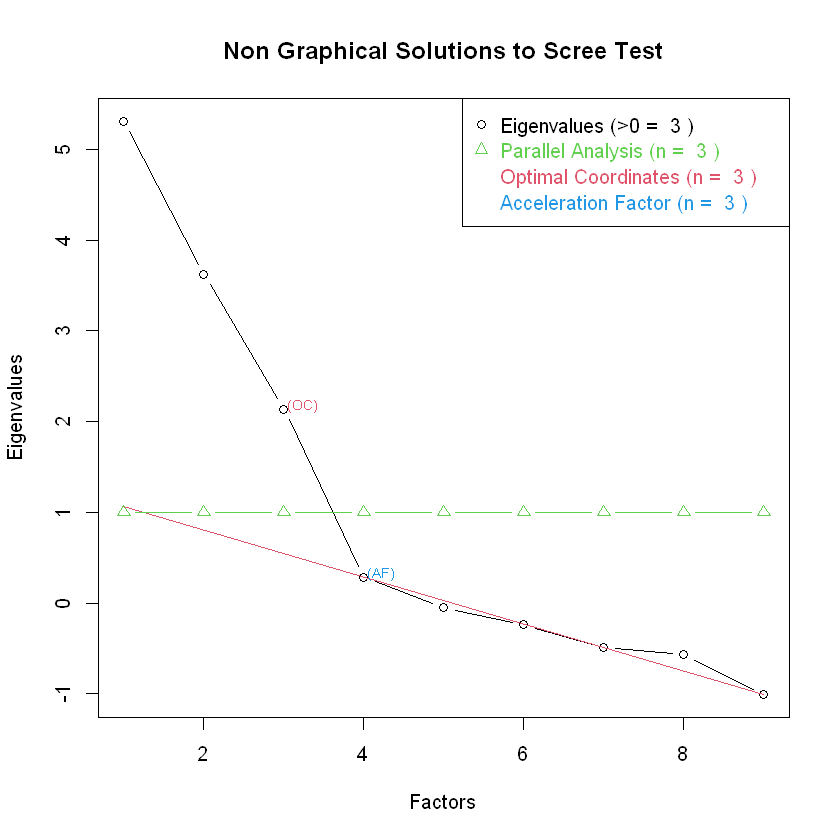

In [76]:
plot(nScree(x=corpdat1,model="factors"))

- Here if we observe the graph all the techniques everything points to choice of 3 factors.
  So, these 3 factors will give us the most 
information about our data

- Now lets run the factor analysis with number of factors as 3. This time we use the `fa()` in the `psych` package, with oblique oblimin rotation `(rotate=“oblimin”)` and principal factor extraction `(fm=“pa”)`.


In [77]:
EFApdat1_3factor <- fa(r = corpdat1, nfactors = 3, 
                       rotate = "oblimin", 
                       fm = "pa")
EFApdat1_3factor

Factor Analysis using method =  pa
Call: fa(r = corpdat1, nfactors = 3, rotate = "oblimin", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
     PA1   PA2   PA3   h2   u2 com
v1  0.90 -0.04  0.06 0.79 0.21 1.0
v2  0.74  0.05  0.00 0.56 0.44 1.0
v3  0.80  0.02 -0.10 0.66 0.34 1.0
v4  0.00  0.78  0.04 0.62 0.38 1.0
v5  0.09  0.54  0.15 0.38 0.62 1.2
v6 -0.03  0.70 -0.10 0.46 0.54 1.0
v7 -0.03  0.01  0.73 0.54 0.46 1.0
v8  0.02  0.04  0.51 0.27 0.73 1.0
v9  0.03 -0.03  0.45 0.20 0.80 1.0

                       PA1  PA2  PA3
SS loadings           2.01 1.41 1.07
Proportion Var        0.22 0.16 0.12
Cumulative Var        0.22 0.38 0.50
Proportion Explained  0.45 0.31 0.24
Cumulative Proportion 0.45 0.76 1.00

 With factor correlations of 
      PA1  PA2   PA3
PA1  1.00 0.21 -0.02
PA2  0.21 1.00  0.26
PA3 -0.02 0.26  1.00

Mean item complexity =  1
Test of the hypothesis that 3 factors are sufficient.

df null model =  36  with the objective function =  2.55
d

- To obtain factor scores for data reduction purposes, We need to input the raw data matrix instead of the correlation matrix. Additionally, we can specify the 'scores' argument to get factor scores using a factor score regression method. (The below code is just doing that)
- To get estimated factor scores, we must provide the raw data as input. Inputting just the correlation matrix will not give us the factor score estimates, but only the factor weights or loadings.
- The 'scores' argument allows us to choose the method for estimating the factor scores from the raw data. One common method is the regression method, where factor scores are estimated as linear combinations of the observed variables, weighted by the regression coefficients.

In [78]:
EFApdat1_3factor <- fa(r = pdat1, nfactors = 3, 
                       rotate = "oblimin", 
                       fm = "pa",
                       scores="regression")
head(EFApdat1_3factor$scores,10)

,PA1,PA2,PA3
1,-0.783420678,-1.1506737,0.5983783
2,-0.262502699,2.1004885,1.8211517
3,0.433115912,-1.7226209,0.3998862
4,-1.419724776,-2.6307726,-0.3797518
5,1.476386714,-0.1114002,-0.6023405
6,0.007833174,1.3577895,0.5681540
7,-0.614527322,-0.8404476,-0.5418789
8,-1.578440465,-0.3701222,-1.1402610
9,0.122523810,0.5020814,0.1907809
10,1.232518910,0.5499773,-0.7593508


- Here `rotate = "oblimin"` specifies that the factor solution should be rotated using the oblimin rotation method, which allows for correlated factors.
- `fm = "pa"` stands for "factor method = parallel analysis". This means that the number of factors to be retained (3 in this case) was determined using the parallel analysis method.

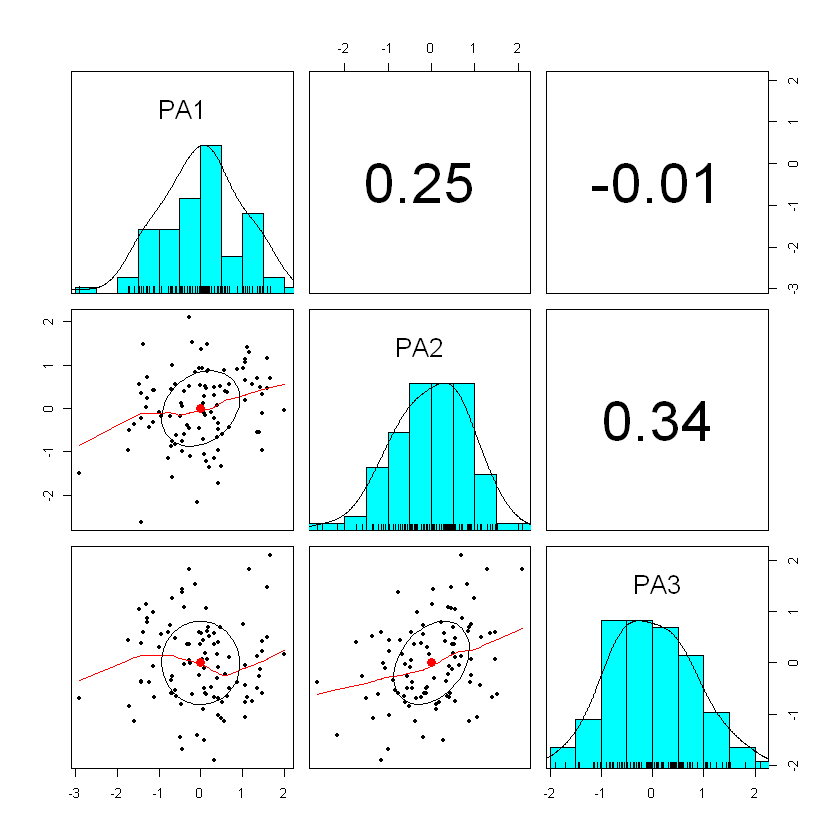

In [79]:
pairs.panels(EFApdat1_3factor$scores)

This is the reduced data of only three factors that we have obtained with the help of parallel analysis(determine number of factors) and factor analysis to reduce the datasize of 9 factors.

In [80]:
EFApdat1_3factor$Vaccounted[3,3]

[1] 0.499181

- As we can see the variance accounted with this three factors is 50%.

In [81]:
day <- 1:100
str(day)

 int [1:100] 1 2 3 4 5 6 7 8 9 10 ...


- We create a sequence of numbers. This will be useful while plotting the before and after factor analysis.

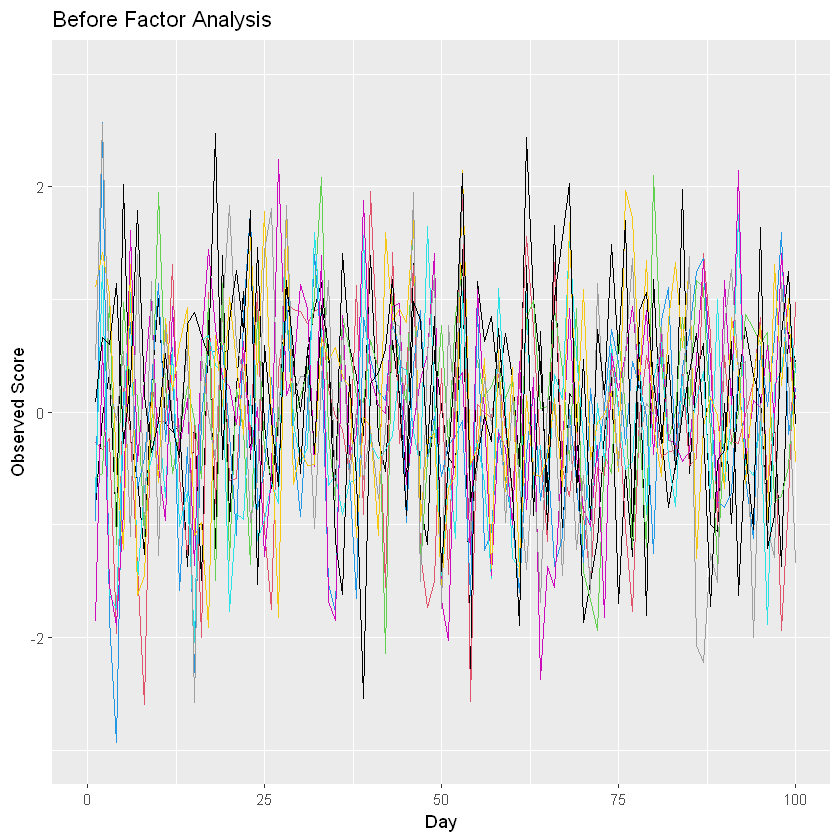

In [82]:
pdat1_plot <- cbind(day,pdat1,EFApdat1_3factor$scores)
#Plotting observed scores
ggplot(data=pdat1_plot, aes(x=day)) +
  geom_line(aes(y=v1), color= 1) + 
  geom_line(aes(y=v2), color= 2) + 
  geom_line(aes(y=v3), color= 3) + 
  geom_line(aes(y=v4), color= 4) + 
  geom_line(aes(y=v5), color= 5) + 
  geom_line(aes(y=v6), color= 6) + 
  geom_line(aes(y=v7), color= 7) + 
  geom_line(aes(y=v8), color= 8) + 
  geom_line(aes(y=v9), color= 9) +
  xlab("Day") + ylab("Observed Score") + 
  scale_x_continuous(limits=c(0,100)) +
  scale_y_continuous(limits=c(-3,3)) + ggtitle('Before Factor Analysis')

### We transformed a Nine dimensional data into....

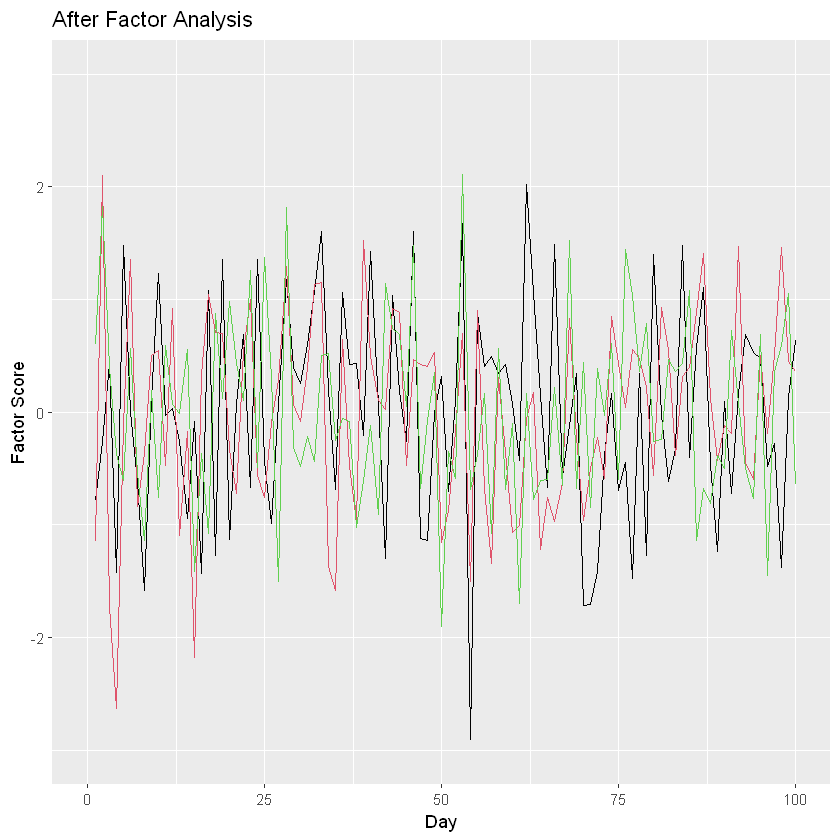

In [83]:
#Plotting factor scores
ggplot(data=pdat1_plot, aes(x=day)) +
  geom_line(aes(y=PA1), color= 1) + 
  geom_line(aes(y=PA2), color= 2) + 
  geom_line(aes(y=PA3), color= 3) + 
  xlab("Day") + ylab("Factor Score") + 
  scale_x_continuous(limits=c(0,100)) +
  scale_y_continuous(limits=c(-3,3)) +ggtitle('After Factor Analysis')

### ..just three dimensional data by using parallel analysis to find the number of factors it can be reduced to and then used factor anaysis to apply the reduction by setting aside 50% of the variance to the dataset.

# Conclusion

I conclude this project by writing down key findings and final points.

- In this Project we have discussed about the data that we have used in real data analysis. Then, we discussed different statistical techniques and terms to inform more about our simulated data and real data.

- I have covered Simulation of Different Distributions Continuous and Discrete. We verified Central Limit Theorem for Normal Distribution, Exponential Distribution, Poisson Distribution and Binomial Distribution. The Statistical measures like mean, median, mode, standard deviation, quantiles were given for the simulated data using code.

- Additionally, Markov Chains and it's different properties were discussed like Ergodicity. Recurrent Events, Variance Reduction Techniques like Simulation, Antithetic Variates, Control Variates Importance sampling were visualized. Simulation of Combinatorial Analysis was also performed.

- Bayes's theorem was used to find out some questions on real world data. We found out answers for our research questions of **whether Taxi drivers get tipped more on a weekend.** with this specific dataset we found out that there is **less than half likelihood of passengers in Chicago tipping more on a weekend i.e 46%**

- In Factor Analysis we first used Parallel analysis to findout possible number of Factors the data can be reduced to and the we use `fa()` i.e factor analysis to  **sucessfully reduce dimension of a Nine feature dataset to just three features** by setting aside 50% of the variance.

# References

- https://openpsychometrics.org/_rawdata/  - - Big Five Personality Dataset
- https://dasl.datadescription.com/datafile/chicago_taxi/ -- Chicago Taxi Dataset
- https://infoguides.gmu.edu/find-data/practice -- Website from where I found this dataset websites
- 
https://quantdev.ssri.psu.edu/sites/qdev/files/ptechdata.csv -- Factor Analysis Data